# Cenário 1

Identificação dos melhores gêneros de jogos eletrônicos para campanhas no Natal

In [ ]:
# Bibliotecas Básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carga dos Dados
games = pd.read_csv('gs://teste_bucket_daniel/Games_Consumers.csv',sep=';',encoding='latin-1')

games.head(10)

,User_ID,Título do Game,Gênero,Data do Lançamento,Data da Compra,Avaliação,Sinopse,Time Desenvolvedor
0,1,Stardew Valley,"['Indie', 'RPG', 'Simulator', 'Strategy']","Feb 26, 2016","Jan 23, 2017",3.8,Stardew Valley is an open-ended country-life R...,"['ConcernedApe', 'Chucklefish Games']"
1,2,Final Fantasy XIV: Endwalker,['RPG'],"Dec 07, 2021","Nov 07, 2022",5.0,Final Fantasy XIV: Endwalker is the fourth exp...,['Square Enix']
2,3,Hotline Miami,"['Arcade', 'Indie', 'Shooter']","Oct 23, 2012","May 21, 2013",3.8,A top-down slasher/shooter with unlockable gam...,"['Dennaton Games', 'Devolver Digital']"
3,4,Hitman: Blood Money,['Shooter'],"May 26, 2006","Jun 21, 2006",4.0,Hitman Blood Money is the fourth installment o...,"['IO Interactive', 'Eidos Interactive']"
4,5,Final Fantasy XIV Online,['RPG'],"Aug 27, 2013","Oct 18, 2013",4.7,Take part in an epic and ever-changing Final F...,['Square Enix']
5,6,Attack of the Friday Monsters! A Tokyo Tale,"['Adventure', 'Simulator']","Jul 17, 2013","Aug 31, 2013",3.7,"Step into the life of Sohta, the young son of ...","['Level-5', 'Millennium Kitchen']"
6,7,Psychonauts 2,"['Adventure', 'Platform']","Aug 24, 2021","Dec 09, 2021",4.2,Psychonauts 2 is a mind-bending trip through t...,"['Xbox Game Studios', 'Double Fine Productions']"
7,8,Path of Exile,['RPG'],"Oct 23, 2013","Dec 19, 2014",5.0,"You are an Exile, struggling to survive on the...",['Grinding Gear Games']
8,9,The House in Fata Morgana,"['Adventure', 'Indie', 'Visual Novel']","Dec 27, 2012","Apr 11, 2013",3.7,A gothic suspense tale set in a cursed mansion...,"['Dramatic Create', 'NOVECT']"
9,10,Infamous 2,"['Adventure', 'Brawler', 'Puzzle']","Jun 07, 2011","Feb 15, 2012",3.7,Blamed for the destruction of Empire City and ...,"['Sucker Punch Productions', 'Sony Computer En..."


In [ ]:
games.shape

(4000, 8)

In [ ]:
games.describe()

,User_ID,Avaliação
count,4000.000000,4000.000000
mean,2000.500000,4.164050
std,1154.844867,0.563864
min,1.000000,1.400000
25%,1000.750000,3.700000
50%,2000.500000,4.100000
75%,3000.250000,4.700000
max,4000.000000,5.000000


In [ ]:
games.isnull().sum()

User_ID               0
Título do Game        0
Gênero                0
Data do Lançamento    0
Data da Compra        0
Avaliação             0
Sinopse               0
Time Desenvolvedor    0
dtype: int64

Remoção das Colunas Desnecessárias:

In [ ]:
exclusao_colunas = ['Data do Lançamento','Sinopse','Time Desenvolvedor','Título do Game']
games.drop(exclusao_colunas, axis=1, inplace=True)

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User_ID         4000 non-null   int64  
 1   Gênero          4000 non-null   object 
 2   Data da Compra  4000 non-null   object 
 3   Avaliação       4000 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 125.1+ KB


Avaliação dos Dados

In [ ]:
games.head(5)

,User_ID,Gênero,Data da Compra,Avaliação
0,1,"['Indie', 'RPG', 'Simulator', 'Strategy']","Jan 23, 2017",3.8
1,2,['RPG'],"Nov 07, 2022",5.0
2,3,"['Arcade', 'Indie', 'Shooter']","May 21, 2013",3.8
3,4,['Shooter'],"Jun 21, 2006",4.0
4,5,['RPG'],"Oct 18, 2013",4.7


In [ ]:
games.tail(5)

,User_ID,Gênero,Data da Compra,Avaliação
3995,3996,['RPG'],"Dec 03, 2013",4.7
3996,3997,['RPG'],"Mar 19, 2016",5.0
3997,3998,"['Adventure', 'Indie', 'Platform', 'Simulator']","Apr 16, 2021",3.7
3998,3999,['Shooter'],"Dec 18, 2004",4.5
3999,4000,"['Adventure', 'Strategy', 'Tactical', 'Turn Ba...","Dec 24, 2023",3.9


### Tratamento da Data de Compra

In [ ]:
games['Data_Compra_Tratada'] = pd.to_datetime(games['Data da Compra'], format='%b %d, %Y', errors='coerce')

In [ ]:
games.head(5)

,User_ID,Gênero,Data da Compra,Avaliação,Data_Compra_Tratada
0,1,"['Indie', 'RPG', 'Simulator', 'Strategy']","Jan 23, 2017",3.8,2017-01-23
1,2,['RPG'],"Nov 07, 2022",5.0,2022-11-07
2,3,"['Arcade', 'Indie', 'Shooter']","May 21, 2013",3.8,2013-05-21
3,4,['Shooter'],"Jun 21, 2006",4.0,2006-06-21
4,5,['RPG'],"Oct 18, 2013",4.7,2013-10-18


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   User_ID              4000 non-null   int64         
 1   Gênero               4000 non-null   object        
 2   Data da Compra       4000 non-null   object        
 3   Avaliação            4000 non-null   float64       
 4   Data_Compra_Tratada  3988 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 156.4+ KB


Localizando Datas fora do Formato

In [ ]:
nome_da_coluna = 'Data_Compra_Tratada'

# Use .loc para selecionar linhas onde o valor na coluna 'coluna_alvo' é nulo
linhas_com_nulos = games.loc[games[nome_da_coluna].isnull()]

# Exiba as linhas onde 'coluna_alvo' é nula
linhas_com_nulos

,User_ID,Gênero,Data da Compra,Avaliação,Data_Compra_Tratada
438,439,['RPG'],#VALOR!,4.9,NaT
545,546,['RPG'],#VALOR!,5.0,NaT
948,949,['RPG'],#VALOR!,4.7,NaT
1236,1237,['RPG'],#VALOR!,4.8,NaT
1326,1327,['RPG'],#VALOR!,4.8,NaT
1497,1498,['RPG'],#VALOR!,4.9,NaT
2034,2035,['RPG'],#VALOR!,4.7,NaT
2140,2141,['RPG'],#VALOR!,5.0,NaT
2429,2430,['RPG'],#VALOR!,4.8,NaT
3142,3143,['RPG'],#VALOR!,4.7,NaT


In [ ]:
games.dropna(subset = ['Data_Compra_Tratada'],inplace = True) #inplace para remover os nulos diretamente na mesma variável

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3988 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   User_ID              3988 non-null   int64         
 1   Gênero               3988 non-null   object        
 2   Data da Compra       3988 non-null   object        
 3   Avaliação            3988 non-null   float64       
 4   Data_Compra_Tratada  3988 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 186.9+ KB


Início do Tratamento do Gênero mantendo apenas 1 Genero por linha

In [ ]:
# Removendo as aspas da variável
def remover_aspas(valor):
    return valor.replace("'", "")

# Aplicar a função apenas à coluna desejada
games['Gênero'] = games['Gênero'].apply(remover_aspas)

# Resultado
games.head()

,User_ID,Gênero,Data da Compra,Avaliação,Data_Compra_Tratada
0,1,"[Indie, RPG, Simulator, Strategy]","Jan 23, 2017",3.8,2017-01-23
1,2,[RPG],"Nov 07, 2022",5.0,2022-11-07
2,3,"[Arcade, Indie, Shooter]","May 21, 2013",3.8,2013-05-21
3,4,[Shooter],"Jun 21, 2006",4.0,2006-06-21
4,5,[RPG],"Oct 18, 2013",4.7,2013-10-18


In [ ]:
# Removendo os colchetes da variável
def remover_colchetes(valor):
    return valor.replace("[", "")

# Aplicar a função apenas à coluna desejada
games['Gênero'] = games['Gênero'].apply(remover_colchetes)

In [ ]:
def remover_colchetes(valor):
    return valor.replace("]", "")

# Aplicar a função apenas à coluna desejada
games['Gênero'] = games['Gênero'].apply(remover_colchetes)

# Resultado
games.head()

,User_ID,Gênero,Data da Compra,Avaliação,Data_Compra_Tratada
0,1,"Indie, RPG, Simulator, Strategy","Jan 23, 2017",3.8,2017-01-23
1,2,RPG,"Nov 07, 2022",5.0,2022-11-07
2,3,"Arcade, Indie, Shooter","May 21, 2013",3.8,2013-05-21
3,4,Shooter,"Jun 21, 2006",4.0,2006-06-21
4,5,RPG,"Oct 18, 2013",4.7,2013-10-18


In [ ]:
games_backup = games.copy()

In [ ]:
#Criando uma lista deduplicada de gênero
games['Gênero'] = games['Gênero'].str.split(', ')

# Crie uma lista vazia para armazenar os gêneros únicos
generos_unicos = []

# Itere pelas listas de gêneros e adicione gêneros únicos à lista
for generos_lista in games['Gênero']:
    generos_unicos.extend(generos_lista)

# Use a função set() para obter os gêneros únicos e converta de volta em uma lista
generos_unicos = list(set(generos_unicos))

# Exiba a lista de gêneros únicos
print(generos_unicos)

['Puzzle', 'Fighting', 'Strategy', 'Tactical', 'Real Time Strategy', 'Quiz/Trivia', 'Shooter', 'Visual Novel', 'Card & Board Game', 'Platform', 'Brawler', 'Sport', 'Music', 'Arcade', 'Turn Based Strategy', 'RPG', 'Indie', 'Point-and-Click', 'Adventure', 'Simulator', 'Racing']


In [ ]:
# Criando colunas separadas para cada gênero
for genero in generos_unicos:
    games[genero] = games['Gênero'].apply(lambda x: 1 if genero in x else 0)

In [ ]:
games.head(5)

,User_ID,Gênero,Data da Compra,Avaliação,Data_Compra_Tratada,Puzzle,Fighting,Strategy,Tactical,Real Time Strategy,...,Arcade,Turn Based Strategy,RPG,Indie,Point-and-Click,Adventure,Simulator,Racing,Ano,Mês
0,1,"[Indie, RPG, Simulator, Strategy]","Jan 23, 2017",3.8,2017-01-23,0,0,1,0,0,...,0,0,1,1,0,0,1,0,2017,1
1,2,[RPG],"Nov 07, 2022",5.0,2022-11-07,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2022,11
2,3,"[Arcade, Indie, Shooter]","May 21, 2013",3.8,2013-05-21,0,0,0,0,0,...,1,0,0,1,0,0,0,0,2013,5
3,4,[Shooter],"Jun 21, 2006",4.0,2006-06-21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2006,6
4,5,[RPG],"Oct 18, 2013",4.7,2013-10-18,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2013,10


In [ ]:
games.tail(5)

,User_ID,Gênero,Data da Compra,Avaliação,Data_Compra_Tratada,Puzzle,Fighting,Strategy,Tactical,Real Time Strategy,...,Arcade,Turn Based Strategy,RPG,Indie,Point-and-Click,Adventure,Simulator,Racing,Ano,Mês
3995,3996,[RPG],"Dec 03, 2013",4.7,2013-12-03,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2013,12
3996,3997,[RPG],"Mar 19, 2016",5.0,2016-03-19,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2016,3
3997,3998,"[Adventure, Indie, Platform, Simulator]","Apr 16, 2021",3.7,2021-04-16,0,0,0,0,0,...,0,0,0,1,0,1,1,0,2021,4
3998,3999,[Shooter],"Dec 18, 2004",4.5,2004-12-18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2004,12
3999,4000,"[Adventure, Strategy, Tactical, Turn Based Str...","Dec 24, 2023",3.9,2023-12-24,0,0,1,1,0,...,0,1,0,0,0,1,0,0,2023,12


In [ ]:
Users = [3,3998]

games_validacao = games['User_ID'].isin(Users)
games_filtrado = games[games_validacao]
games_filtrado

,User_ID,Gênero,Data da Compra,Avaliação,Data_Compra_Tratada,Puzzle,Fighting,Strategy,Tactical,Real Time Strategy,...,Arcade,Turn Based Strategy,RPG,Indie,Point-and-Click,Adventure,Simulator,Racing,Ano,Mês
2,3,"[Arcade, Indie, Shooter]","May 21, 2013",3.8,2013-05-21,0,0,0,0,0,...,1,0,0,1,0,0,0,0,2013,5
3997,3998,"[Adventure, Indie, Platform, Simulator]","Apr 16, 2021",3.7,2021-04-16,0,0,0,0,0,...,0,0,0,1,0,1,1,0,2021,4


Agora temos as varáveis resposta em colunas, precisamos colocá-las em linha para iniciar o processamento do modelo e separar as partículas da data de compra

In [ ]:
# Crie colunas separadas para ano e mês
games['Ano'] = games['Data_Compra_Tratada'].dt.year
games['Mês'] = games['Data_Compra_Tratada'].dt.month

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3988 entries, 0 to 3999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   User_ID              3988 non-null   int64         
 1   Gênero               3988 non-null   object        
 2   Data da Compra       3988 non-null   object        
 3   Avaliação            3988 non-null   float64       
 4   Data_Compra_Tratada  3988 non-null   datetime64[ns]
 5   Puzzle               3988 non-null   int64         
 6   Fighting             3988 non-null   int64         
 7   Strategy             3988 non-null   int64         
 8   Tactical             3988 non-null   int64         
 9   Real Time Strategy   3988 non-null   int64         
 10  Quiz/Trivia          3988 non-null   int64         
 11  Shooter              3988 non-null   int64         
 12  Visual Novel         3988 non-null   int64         
 13  Card & Board Game    3988 non-nul

In [ ]:
type(games)

pandas.core.frame.DataFrame

In [ ]:
df_teste = pd.melt(games, id_vars=['User_ID','Data da Compra','Avaliação','Ano',
                                   'Mês'], var_name='Genero', value_name='Genero_Valor')



In [ ]:
df_teste = df_teste[df_teste['Genero_Valor'] == 1]

In [ ]:
df_teste

,User_ID,Data da Compra,Avaliação,Ano,Mês,Genero,Genero_Valor
7985,10,"Feb 15, 2012",3.7,2012,2,Puzzle,1
7986,11,"Nov 13, 2018",3.8,2018,11,Puzzle,1
7997,22,"Aug 29, 2019",3.6,2019,8,Puzzle,1
8001,26,"Apr 29, 2002",4.3,2002,4,Puzzle,1
8013,38,"Nov 11, 2007",3.9,2007,11,Puzzle,1
...,...,...,...,...,...,...,...
90943,3218,"Dec 10, 2011",3.3,2011,12,Racing,1
91225,3501,"Jul 15, 2000",4.0,2000,7,Racing,1
91296,3573,"Dec 23, 2011",3.3,2011,12,Racing,1
91335,3612,"Dec 18, 2022",3.8,2022,12,Racing,1


**Validando se a tratativa pegou todos os gêneros corretamente.**

User_ID > 3 (Arcade, Indie, Shooter)
User ID > 3997 (Adventure, Indie, RPG, Turn Based Strategy)

In [ ]:
# Recriando o índice
df_teste.reset_index(drop=True, inplace=True)

In [ ]:
Users = [3,3998]

games_validacao = df_teste['User_ID'].isin(Users)
games_filtrado = df_teste[games_validacao]
games_filtrado

,User_ID,Data da Compra,Avaliação,Ano,Mês,Genero,Genero_Valor
868,3,"May 21, 2013",3.8,2013,5,Shooter,1
2621,3998,"Apr 16, 2021",3.7,2021,4,Platform,1
2966,3,"May 21, 2013",3.8,2013,5,Arcade,1
4602,3,"May 21, 2013",3.8,2013,5,Indie,1
5159,3998,"Apr 16, 2021",3.7,2021,4,Indie,1
6460,3998,"Apr 16, 2021",3.7,2021,4,Adventure,1
6687,3998,"Apr 16, 2021",3.7,2021,4,Simulator,1


In [ ]:
games = pd.DataFrame(df_teste)

In [ ]:
games

,User_ID,Data da Compra,Avaliação,Ano,Mês,Genero,Genero_Valor
0,10,"Feb 15, 2012",3.7,2012,2,Puzzle,1
1,11,"Nov 13, 2018",3.8,2018,11,Puzzle,1
2,22,"Aug 29, 2019",3.6,2019,8,Puzzle,1
3,26,"Apr 29, 2002",4.3,2002,4,Puzzle,1
4,38,"Nov 11, 2007",3.9,2007,11,Puzzle,1
...,...,...,...,...,...,...,...
6714,3218,"Dec 10, 2011",3.3,2011,12,Racing,1
6715,3501,"Jul 15, 2000",4.0,2000,7,Racing,1
6716,3573,"Dec 23, 2011",3.3,2011,12,Racing,1
6717,3612,"Dec 18, 2022",3.8,2022,12,Racing,1


In [ ]:
games_df = games.drop(columns=['Genero_Valor', 'Data da Compra'])
games_df = games_df.rename(columns={'Genero_2': 'Genero'})

In [ ]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6719 entries, 0 to 6718
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   User_ID    6719 non-null   int64  
 1   Avaliação  6719 non-null   float64
 2   Ano        6719 non-null   int64  
 3   Mês        6719 non-null   int64  
 4   Genero     6719 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 262.6+ KB


## **Análise Unidimencional**

A variável ***User_ID*** é um ID de usuário onde embora seja numérico, não possui uma ordenação ou informação de entrada relevante.

A variável ***Avaliação*** é uma nota em ponto flutuante que faz todo sentido para análises exploratórias.

A varável ***Ano*** e ***Mês*** são Variáveis temporais que podem ser analisadas e/ou filtradas

A variável ***Genero*** é uma variável categórica além de ser nosso rótulo (variável resposta)

In [ ]:
games_df.shape

(6719, 5)

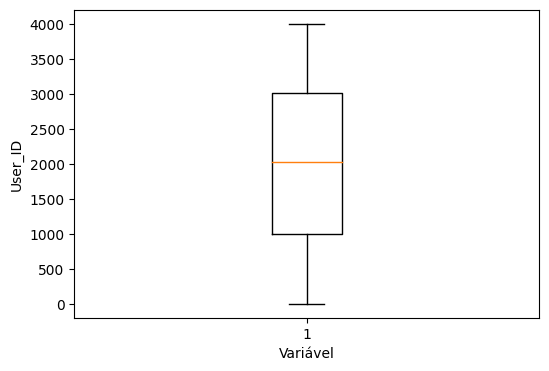

In [ ]:
# Análise da variável User_ID
plt.figure(figsize=(6, 4))

# Crie um boxplot da variável 'Avaliação'
plt.boxplot(games_df['User_ID'])

# Adicione rótulos aos eixos
plt.xlabel('Variável')
plt.ylabel('User_ID')
plt.show()

Como previsto, a variável User_ID só informa que temos quase 4 mil usuários, porém por se tratar de um ID não traz demais informações para análise

In [ ]:
usuarios_total = games_df['User_ID'].nunique()
duplicatas = games_df[games_df.duplicated(subset='User_ID', keep=False)]
usuarios_duplicados = duplicatas['User_ID'].nunique()
percentual_duplicados = (usuarios_duplicados / usuarios_total) * 100
print(f'Quantidade de usuários duplicados: {usuarios_duplicados}')
print(f'Percentual de usuários duplicados: {percentual_duplicados:.2f}%')

Quantidade de usuários duplicados: 1663
Percentual de usuários duplicados: 41.70%


In [ ]:
tabela_cruzada = games_df.groupby('User_ID').size().reset_index(name='Quantidade')
tabela_cruzada = tabela_cruzada.sort_values(by='Quantidade', ascending=False)
total_linhas = len(games_df)
tabela_cruzada['Percentual do Total'] = (tabela_cruzada['Quantidade'] / total_linhas) * 100
print(tabela_cruzada)

      User_ID  Quantidade  Percentual do Total
1666     1673           5             0.074416
3091     3101           5             0.074416
899       902           5             0.074416
1643     1650           5             0.074416
56         57           5             0.074416
...       ...         ...                  ...
2296     2305           1             0.014883
2297     2306           1             0.014883
1005     1009           1             0.014883
227       228           1             0.014883
2688     2698           1             0.014883

[3988 rows x 3 columns]


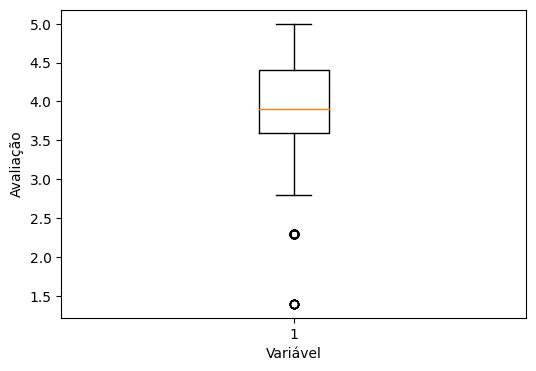

In [ ]:
# Análise da variável Avaliação
plt.figure(figsize=(6, 4))

# Crie um boxplot da variável 'Avaliação'
plt.boxplot(games_df['Avaliação'])

# Adicione rótulos aos eixos
plt.xlabel('Variável')
plt.ylabel('Avaliação')
plt.show()

Aqui podemos notar que a Avaliação se concentra em torno de 3,8 a 4,2, com uma distribuição normal.
Temos alguns outliers que podem ser filtrados.

Sendo assim antes de seguir para o treinamento dos modelos, seguiremos com a filtragem da variável Avaliação, onde vamos filtrar apenas games com mais de 3,8 de avaliação.

In [ ]:
df_filtrado = games_df.query('Avaliação >= 3.8')

In [ ]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4202 entries, 1 to 6717
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   User_ID    4202 non-null   int64  
 1   Avaliação  4202 non-null   float64
 2   Ano        4202 non-null   int64  
 3   Mês        4202 non-null   int64  
 4   Genero     4202 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 197.0+ KB


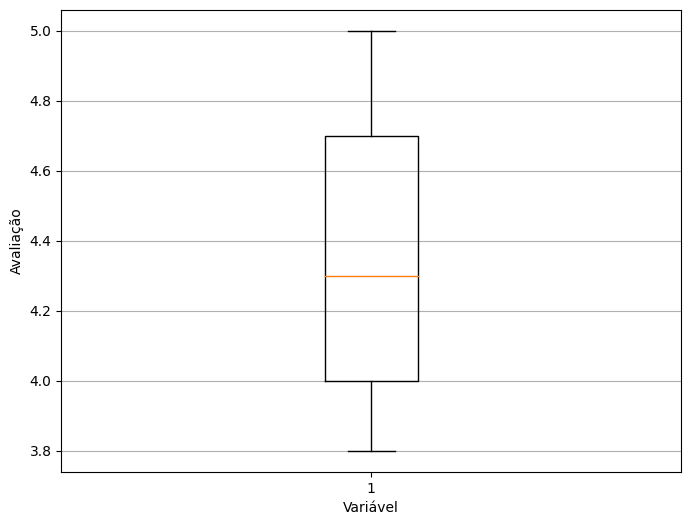

In [ ]:
# Nova Análise da variável Avaliação
plt.figure(figsize=(8, 6))

# Crie um boxplot da variável 'Avaliação'
plt.boxplot(df_filtrado['Avaliação'])

# Adicione rótulos aos eixos
plt.xlabel('Variável')
plt.ylabel('Avaliação')
plt.grid(axis='y') #Inclusão de linhas de grade para melhor compreensão dos dados
plt.show()

Agora estamos com uma avaliação entre 3,8 a 5,0 com mediana em 4,3.

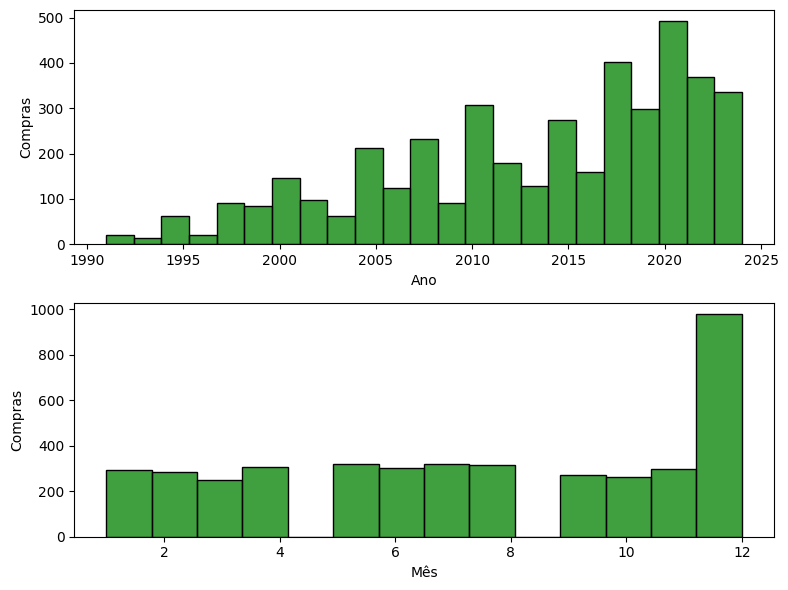

In [ ]:
# Análise das variáveis Mês e Ano (Temporais)
lista_features = ['Ano', 'Mês']

# Plotagem
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Plotagem dos histogramas
for i, ax in enumerate(axes.flatten()):
    if i < len(lista_features):
        sns.histplot(x=df_filtrado[lista_features[i]], color='green', ax=ax)
        ax.set_xlabel(lista_features[i])
        ax.set_ylabel('Compras')

# Ajustando o espaçamento entre subplots
plt.tight_layout()

# Exibindo os histogramas
plt.show()

Percebemos que há informações anteriores a 2006, quando a PlayStation Store foi lançada, isso pode ocorrer por ruído nos dados ou erros nas coletas. O ideal conhecendo a natureza do negócio é remover dados anteriores a 2006.
Em relação às venddas por mês, percebe-se um comportamento constrante tendo um leve aumento em novembro e dezembro.

### Limpeza dos registos com ano inferior a 2006.

In [ ]:
condicao = df_filtrado['Ano'] >= 2006
games_df = df_filtrado[condicao]
games_df = games_df.reset_index(drop=True)
games_df

,User_ID,Avaliação,Ano,Mês,Genero
0,11,3.8,2018,11,Puzzle
1,38,3.9,2007,11,Puzzle
2,60,3.9,2022,9,Puzzle
3,61,4.1,2015,11,Puzzle
4,80,4.6,2017,9,Puzzle
...,...,...,...,...,...
3386,2353,4.2,2023,8,Racing
3387,2647,3.9,2020,6,Racing
3388,2666,3.9,2020,1,Racing
3389,2701,3.9,2019,8,Racing


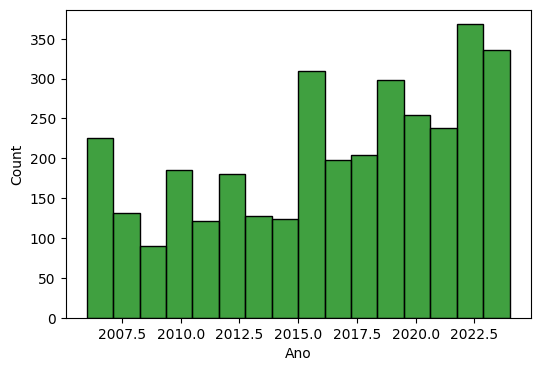

In [ ]:
# Plotagem dos histogramas
plt.figure(figsize=(6, 4))
sns.histplot(x=games_df['Ano'], color='green')
ax.set_xlabel('Ano')
ax.set_ylabel('Compras')

# Ajustando o espaçamento entre subplots
plt.show()

In [ ]:
from genericpath import getatime
games_df['Data'] = pd.to_datetime(games_df['Ano'].astype(str) + '-' + games_df['Mês'].astype(str) + '-01')
games_df_indexado = games_df.set_index('Data')
games_df_indexado

,User_ID,Avaliação,Ano,Mês,Genero
Data,,,,,
2018-11-01,11,3.8,2018,11,Puzzle
2007-11-01,38,3.9,2007,11,Puzzle
2022-09-01,60,3.9,2022,9,Puzzle
2015-11-01,61,4.1,2015,11,Puzzle
2017-09-01,80,4.6,2017,9,Puzzle
...,...,...,...,...,...
2023-08-01,2353,4.2,2023,8,Racing
2020-06-01,2647,3.9,2020,6,Racing
2020-01-01,2666,3.9,2020,1,Racing


In [ ]:
# Extraia os anos e meses
games_df_indexado['Mês'] = games_df_indexado.index.month

# Agregação por mês, somando os valores de todos os anos
games_df_indexado = games_df_indexado.groupby(['Mês'])['User_ID'].count().reset_index()
games_df_indexado

,Mês,User_ID
0,1,253
1,2,227
2,3,197
3,4,254
4,5,258
5,6,264
6,7,267
7,8,261
8,9,218
9,10,214


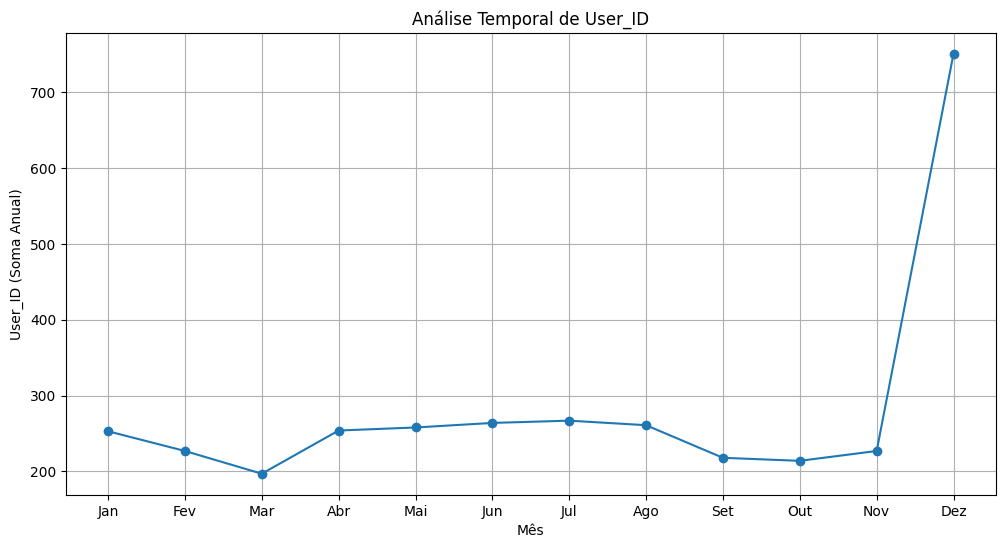

In [ ]:
# Plote o gráfico de série temporal
plt.figure(figsize=(12, 6))
plt.plot(games_df_indexado['Mês'], games_df_indexado['User_ID'], marker='o', linestyle='-')

# Adicione rótulos aos eixos e um título
plt.xlabel('Mês')
plt.ylabel('User_ID (Soma Anual)')
plt.title('Análise Temporal de User_ID')

# Defina os rótulos dos meses no eixo x
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
plt.xticks(range(1, 13), meses)

# Exiba o gráfico
plt.grid(True)
plt.show()

In [ ]:
# Tratativa da Variável Gênero
tabela_cruzada = games_df.groupby('Genero').size().reset_index(name='Quantidade')
tabela_cruzada = tabela_cruzada.sort_values(by='Quantidade', ascending=False)
total_linhas = len(games_df)
tabela_cruzada['Percentual do Total'] = ((tabela_cruzada['Quantidade'] / total_linhas) * 100).round(2)
tabela_cruzada_df = tabela_cruzada[['Genero', 'Quantidade', 'Percentual do Total']]
tabela_cruzada_df

,Genero,Quantidade,Percentual do Total
11,RPG,1139,33.59
14,Shooter,524,15.45
0,Adventure,514,15.16
7,Platform,207,6.10
2,Brawler,190,5.60
9,Puzzle,154,4.54
5,Indie,131,3.86
20,Visual Novel,119,3.51
15,Simulator,100,2.95
17,Strategy,77,2.27


Temos alguns gêneros com representatividade muito baixa (menor que 1%) vamos agrupá-los em demais gêneros semelhantes e outros vamos descartar.

**Quiz/Trivia** = Descartar

**Real Time Strategy** = Strategy

**Card & Board Game** = Descartar

**Sport** = Racing

**Music** = Descartar

**Racing** manterá Racing

**Tactical** = Strategy = Embora são gêneros diferentes dependendo da ação a longo ou curto prazo, para nosso objetivo classificaremos como mesmo gênero.

**Point-and_Click** = Manter

**Fighting** = Brawler (Embora sejam gêneros diferentes, para nossa regra de negócio, classficaremos como o mesmo gênero visto que ambos são voltados para porradaria seja 1 contra 1 ou 1 contra diversos)

**Turn Based Strategy** = Strategy

In [ ]:
# Lista com os valores desejados para remoção em Gênero
remove = ['Quiz/Trivia', 'Card & Board Game', 'Music']

# Filtra os valores desejados
games_df = games_df[~games_df['Genero'].isin(remove)]

# Atualiza o índice
games_df = games_df.reset_index(drop=True)

In [ ]:
# Lista de substituições no Dicionário para Gênero
generos_alteracao = {"Real Time Strategy":"Strategy",
                     "Tactical":"Strategy",
                     "Turn Based Strategy":"Strategy",
                     "Sport":"Racing",
                     "Fighting":"Brawler"}

# Substitui os valores
games_df['Genero'] = games_df['Genero'].replace(generos_alteracao)


In [ ]:
# Reavaliação do campo Genero
tabela_cruzada = games_df.groupby('Genero').size().reset_index(name='Quantidade')
tabela_cruzada = tabela_cruzada.sort_values(by='Quantidade', ascending=False)
total_linhas = len(games_df)
tabela_cruzada['Percentual do Total'] = (tabela_cruzada['Quantidade'] / total_linhas) * 100
print(tabela_cruzada)

             Genero  Quantidade  Percentual do Total
7               RPG        1139            33.828334
9           Shooter         524            15.562816
0         Adventure         514            15.265815
2           Brawler         234             6.949807
4          Platform         207             6.147906
6            Puzzle         154             4.573805
11         Strategy         136             4.039204
3             Indie         131             3.890704
12     Visual Novel         119             3.534304
10        Simulator         100             2.970003
5   Point-and-Click          43             1.277101
1            Arcade          41             1.217701
8            Racing          25             0.742501


Ainda temos um número alto de gêneros diferentes, o ideal é que fossem até 10. Sendo assim vamor excluir gêneros com menos de 5% de representatividade do conjunto.

In [ ]:
# Lista com os valores desejados para remoção em Gênero
remove = ['Racing', 'Point-and-Click', 'Arcade','Visual Novel']
games_df = games_df[~games_df['Genero'].isin(remove)]
games_df = games_df.reset_index(drop=True)

In [ ]:
# Reavaliação do campo Genero
tabela_cruzada = games_df.groupby('Genero').size().reset_index(name='Quantidade')
tabela_cruzada = tabela_cruzada.sort_values(by='Quantidade', ascending=False)
total_linhas = len(games_df)
tabela_cruzada['Percentual do Total'] = (tabela_cruzada['Quantidade'] / total_linhas) * 100
print(tabela_cruzada)

      Genero  Quantidade  Percentual do Total
5        RPG        1139            36.285441
6    Shooter         524            16.693214
0  Adventure         514            16.374642
1    Brawler         234             7.454603
3   Platform         207             6.594457
4     Puzzle         154             4.906021
8   Strategy         136             4.332590
2      Indie         131             4.173304
7  Simulator         100             3.185728


### Análise do Gênero em Histograma

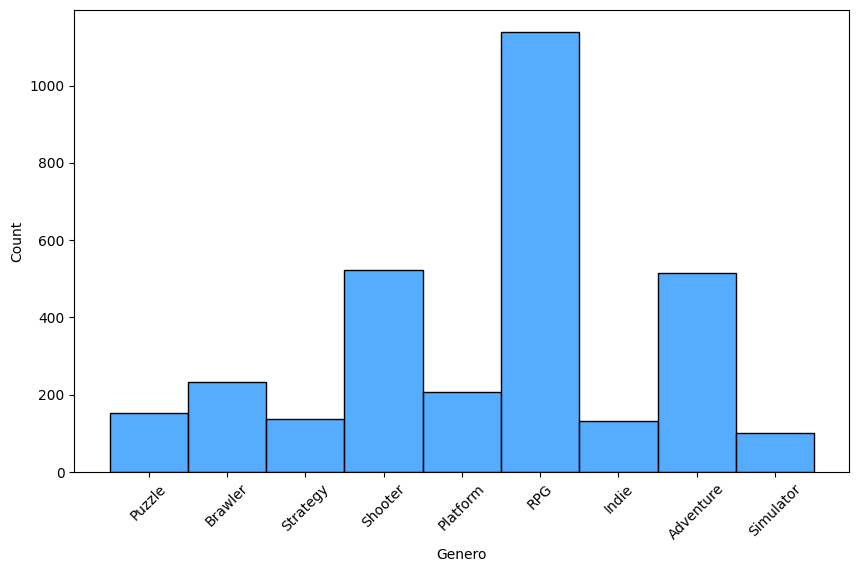

In [ ]:
# Plotagem dos histogramas
contagem_generos = games_df['Genero'].value_counts()
generos_ordenados = contagem_generos.index

plt.figure(figsize=(10, 6))
sns.histplot(data=games_df, x='Genero', color='dodgerblue')
ax.set_xlabel('Genero')
plt.xticks(rotation=45)  # Rotação dos rótulos para melhor legibilidade
ax.set_ylabel('Compras')
plt.show()

## **Análise Bidimensional**

### Relações entre duas variáveis.

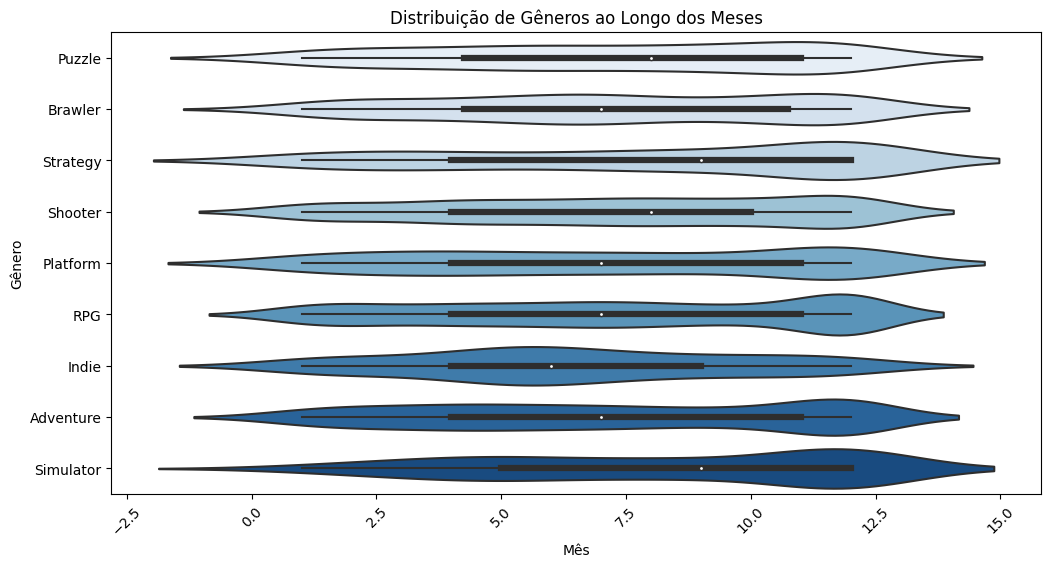

In [ ]:
# Genero e Mês
plt.figure(figsize=(12, 6))
sns.violinplot(data=games_df, x='Mês', y='Genero', palette='Blues')
plt.xticks(rotation=45)
plt.xlabel('Mês')
plt.ylabel('Gênero')
plt.title('Distribuição de Gêneros ao Longo dos Meses')
plt.show()

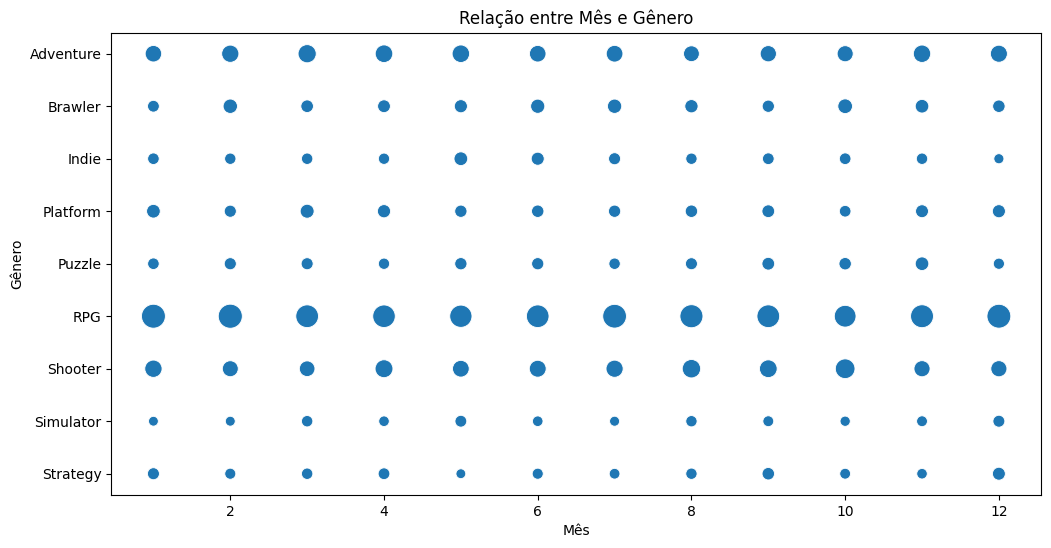

In [ ]:

# Gráfico de Dispersão
contagem_genero_mes = games_df.groupby(['Mês', 'Genero']).size().reset_index(name='Quantidade')
contagem_total_genero_mes = contagem_genero_mes.groupby('Mês')['Quantidade'].sum().reset_index()
contagem_genero_mes = contagem_genero_mes.merge(contagem_total_genero_mes, on='Mês', suffixes=('', '_total'))
contagem_genero_mes['Representatividade'] = (contagem_genero_mes['Quantidade'] / contagem_genero_mes['Quantidade_total']) * 100

plt.figure(figsize=(12, 6))
sns.scatterplot(data=contagem_genero_mes, x='Mês', y='Genero', size='Representatividade', sizes=(50, 300), legend=False)
plt.xlabel('Mês')
plt.ylabel('Gênero')
plt.title('Relação entre Mês e Gênero')
plt.show()

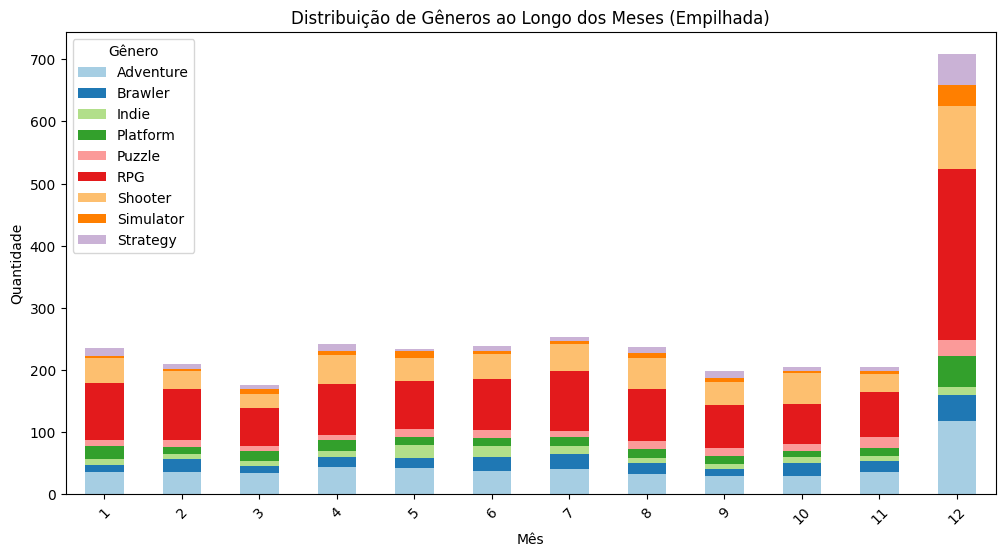

In [ ]:
contagem_genero_mes = games_df.groupby(['Mês', 'Genero']).size().unstack(fill_value=0)
colors = plt.cm.Paired(range(len(contagem_genero_mes.columns)))

plt.figure(figsize=(12, 6))
contagem_genero_mes.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())
plt.xticks(rotation=45)
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.title('Distribuição de Gêneros ao Longo dos Meses (Empilhada)')
plt.legend(title='Gênero')
plt.show()

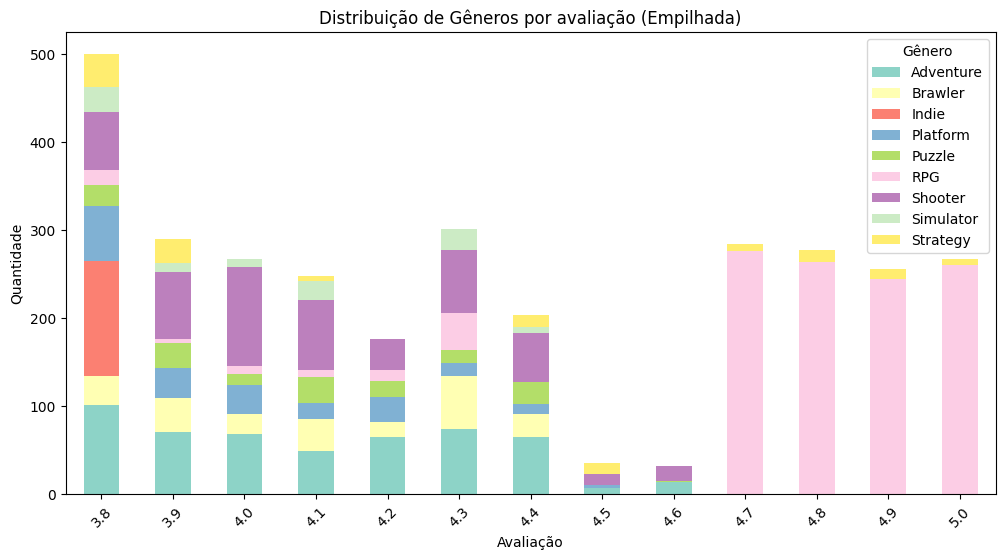

In [ ]:
# Gênero vs Avaliação
contagem_genero_avaliacao = games_df.groupby(['Avaliação', 'Genero']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
contagem_genero_avaliacao.plot(kind='bar', stacked=True, colormap='Set3', ax=plt.gca())
plt.xticks(rotation=45)
plt.xlabel('Avaliação')
plt.ylabel('Quantidade')
plt.title('Distribuição de Gêneros por avaliação (Empilhada)')
plt.legend(title='Gênero')
plt.show()

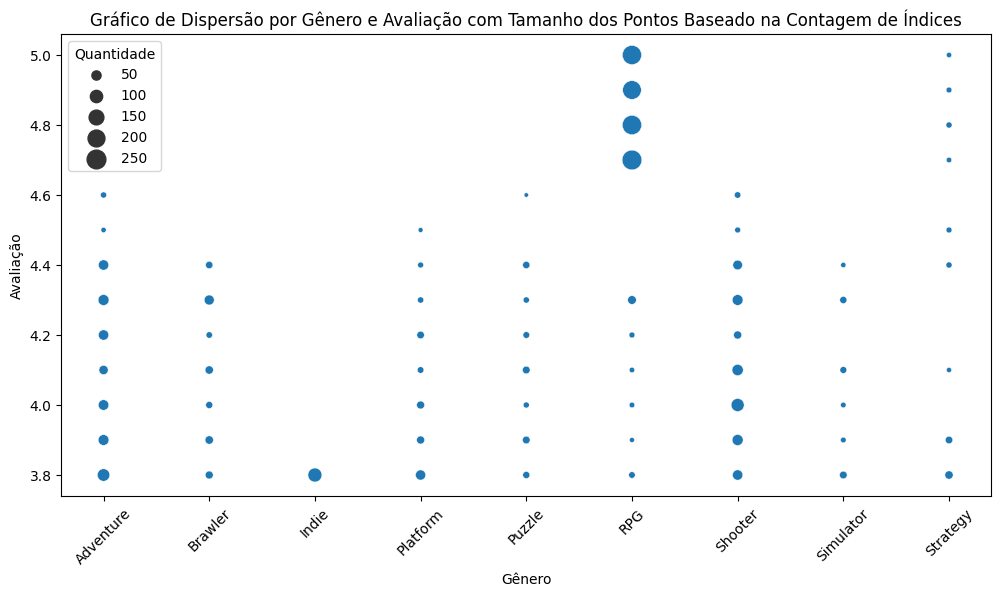

In [ ]:
#Dispersão de Gênero por Avaliação e Quantidade
contagem = games_df.groupby(['Genero', 'Avaliação']).size().reset_index(name='Quantidade')

plt.figure(figsize=(12, 6))
sns.scatterplot(data=contagem, x='Genero', y='Avaliação', size='Quantidade', sizes=(10, 200))
plt.xticks(rotation=45)
plt.xlabel('Gênero')
plt.ylabel('Avaliação')
plt.title('Gráfico de Dispersão por Gênero e Avaliação com Tamanho dos Pontos Baseado na Contagem de Índices')
plt.show()

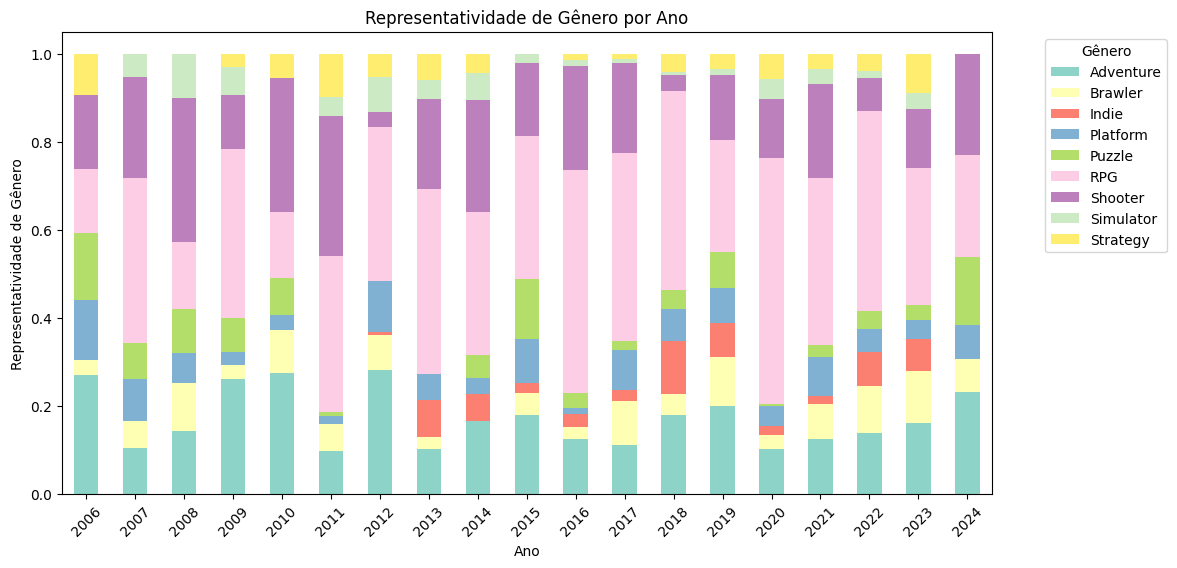

In [ ]:
# Representatividade de Gênero por Ano
contagem_genero_ano = games_df.groupby(['Ano', 'Genero']).size().unstack(fill_value=0)

# Normaliza os valores para obter a representatividade de gênero por ano
representatividade_genero_ano = contagem_genero_ano.div(contagem_genero_ano.sum(axis=1), axis=0)

plt.figure(figsize=(12, 6))
representatividade_genero_ano.plot(kind='bar', stacked=True, colormap='Set3', ax=plt.gca())
plt.xticks(rotation=45)
plt.xlabel('Ano')
plt.ylabel('Representatividade de Gênero')
plt.title('Representatividade de Gênero por Ano')
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

 ## **Início do Treino para Machine Learning no notebook em no Vertex AI**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import multilabel_confusion_matrix, classification_report,confusion_matrix
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree

In [ ]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3139 entries, 0 to 3138
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   User_ID    3139 non-null   int64         
 1   Avaliação  3139 non-null   float64       
 2   Ano        3139 non-null   int64         
 3   Mês        3139 non-null   int64         
 4   Genero     3139 non-null   object        
 5   Data       3139 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 147.3+ KB


Como todos os algorítmos que vamos utilizar nesse cenário, trabalham com variáveis alvo multiclasse (com diversos valores no alvo), não é necessário binarizar a variável resposta.

In [ ]:
# Definindo as colunas de entrada e saída
X = games_df[['Mês', 'Avaliação']]
y = games_df[['Genero']]

In [ ]:
X

,Mês,Avaliação
0,11,3.8
1,11,3.9
2,9,3.9
3,11,4.1
4,9,4.6
...,...,...
3134,12,4.3
3135,3,4.1
3136,4,3.9
3137,12,3.8


In [ ]:
y

,Genero
0,Puzzle
1,Puzzle
2,Puzzle
3,Puzzle
4,Puzzle
...,...
3134,Simulator
3135,Simulator
3136,Simulator
3137,Simulator


In [ ]:
# Dividindo o conjunto de dados em treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((2197, 2), (942, 2), (2197, 1), (942, 1))

# Modelo de Classificação Floresta Randômica

In [ ]:
# Modelo de classificação Floresta Randômica com 100 árvores de decisão
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# Treine o modelo com os dados de treinamento
modelo.fit(X_treino, y_treino['Genero'].ravel())

RandomForestClassifier(random_state=42)

Acurácia: 0.505307855626327
Precisão: 0.48255619351692053
Recall: 0.505307855626327
F1-Score: 0.4623446204350922


Matriz de Confusão:




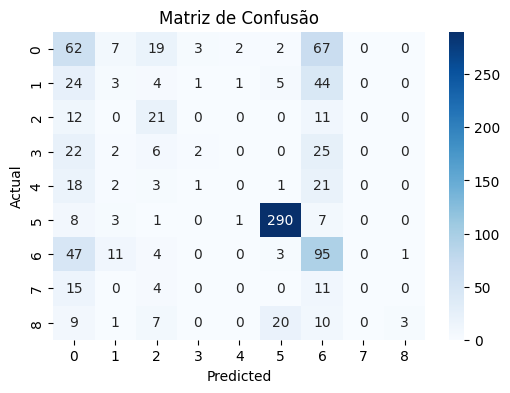

Relatório de Classificação:


              precision    recall  f1-score   support

   Adventure       0.29      0.38      0.33       162
     Brawler       0.10      0.04      0.05        82
       Indie       0.30      0.48      0.37        44
    Platform       0.29      0.04      0.06        57
      Puzzle       0.00      0.00      0.00        46
         RPG       0.90      0.94      0.92       310
     Shooter       0.33      0.59      0.42       161
   Simulator       0.00      0.00      0.00        30
    Strategy       0.75      0.06      0.11        50

    accuracy                           0.51       942
   macro avg       0.33      0.28      0.25       942
weighted avg       0.48      0.51      0.46       942



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Previsões com os dados de teste
predicao = modelo.predict(X_teste)

# Calcula a acurácia usando a função accuracy_score
acuracia = accuracy_score(y_teste, predicao)

# Calcula a precisão usando a função precision_score
precisao = precision_score(y_teste, predicao, average ='weighted', zero_division=0)
#usamos average ='weighted' quando desejamos dar mais peso às classes que
#tem mais amostras como em nosso conjunto de dados

# Calcula o recall usando a função recall_score
recall = recall_score(y_teste, predicao, average ='weighted', zero_division=0)

# Calcula o F1-score usando a função f1_score
f1 = f1_score(y_teste, predicao, average ='weighted', zero_division=0)

# Calcula a matriz de confusão
Confusao = confusion_matrix(y_teste, predicao)

# Exibe todas as métricas e a matriz de confusão
print(f'\033[1mAcurácia:\033[0m {acuracia}')
print(f'\033[1mPrecisão:\033[0m {precisao}')
print(f'\033[1mRecall:\033[0m {recall}')
print(f'\033[1mF1-Score:\033[0m {f1}')
print('\n')

# Exiba a matriz de confusão usando seaborn
print(f'\033[1mMatriz de Confusão:\033[0m')
print('\n')
plt.figure(figsize=(6, 4))
sns.heatmap(Confusao, annot=True, fmt="d", cmap="Blues")# xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de Classificação por Valor do Alvo
report = classification_report(y_teste, predicao)

print(f'\033[1mRelatório de Classificação:\033[0m')
print('\n')
print(report)

A partir do F1-Score e Acurácia acima, identificamos que o modelo está com baixo desempenho, pois analisando o F1-Score de 0.46 entendemos que o modelo não está alcançando um bom equilíbrio entre precisão e recall. Praticamente falando, ele está predizendo de forma imprecisa ou deixando de identificar corretamente muitos exemplos positivos.

A métrica de Acurácia também está muito baixa (0.50) ou seja, acertando apenas 50% das predições.

Analisando a matriz de confusão também percebemos um alto valor de predição para um único valor da variável alvo que é o Gênero **RPG**.

Será necessário reavaliar o conjunto de dados para **diminuir** o número de rótulos assim como priorizar o número de anos visando melhora das métricas acima.

# Modelo de Classificação Gradient Boosting Machine (Biblioteca xgboost)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.5116772823779193
Precisão: 0.48610895582499647
Recall: 0.5116772823779193
F1-Score: 0.46515727269452295


Matriz de Confusão:




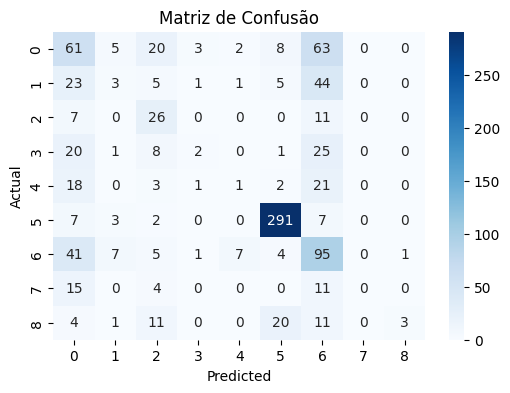



Relatório de Classificação:


              precision    recall  f1-score   support

           0       0.31      0.38      0.34       162
           1       0.15      0.04      0.06        82
           2       0.31      0.59      0.41        44
           3       0.25      0.04      0.06        57
           4       0.09      0.02      0.04        46
           5       0.88      0.94      0.91       310
           6       0.33      0.59      0.42       161
           7       0.00      0.00      0.00        30
           8       0.75      0.06      0.11        50

    accuracy                           0.51       942
   macro avg       0.34      0.29      0.26       942
weighted avg       0.49      0.51      0.47       942



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Criar a base do modelo XGBoost
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Para XGBClassifier, foi necessário converter os valores de texto em valores numéricos
y_encoded = label_encoder.fit_transform(y_treino)
y_encoded_Test = label_encoder.fit_transform(y_teste)

GBM = XGBClassifier()
GBM.fit(X_treino, y_encoded)
Predicao_GBM = GBM.predict(X_teste)

# Acurácia
acuracia = accuracy_score(y_encoded_Test, Predicao_GBM)

# Precisão
precisao = precision_score(y_encoded_Test, Predicao_GBM, average ='weighted', zero_division=0)

# Recall
recall = recall_score(y_encoded_Test, Predicao_GBM, average ='weighted', zero_division=0)

# F1-score
f1 = f1_score(y_encoded_Test, Predicao_GBM, average ='weighted', zero_division=0)

# Matriz de confusão
Confusao = confusion_matrix(y_encoded_Test, Predicao_GBM)

# Exibe todas as métricas e a matriz de confusão
print(f'\033[1mAcurácia:\033[0m {acuracia}')
print(f'\033[1mPrecisão:\033[0m {precisao}')
print(f'\033[1mRecall:\033[0m {recall}')
print(f'\033[1mF1-Score:\033[0m {f1}')
print('\n')

# Exiba a matriz de confusão usando seaborn
print(f'\033[1mMatriz de Confusão:\033[0m')
print('\n')
plt.figure(figsize=(6, 4))
sns.heatmap(Confusao, annot=True, fmt="d", cmap="Blues")# xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de Classificação por Valor do Alvo
report = classification_report(y_encoded_Test, Predicao_GBM)
print('\n')
print(f'\033[1mRelatório de Classificação:\033[0m')
print('\n')
print(report)

Mesmo utilizando Gradient Boost, o modelo não apresentou bons resultados.
A partir do F1-Score e Acurácia acima, identificamos que o modelo está com baixo desempenho, pois analisando o F1-Score de 0.46 entendemos que o modelo não está alcançando um bom equilíbrio entre precisão e recall. Praticamente falando, ele está predizendo de forma imprecisa ou deixando de identificar corretamente muitos exemplos positivos.

A métrica de Acurácia também está muito baixa (0.51) ou seja, acertando apenas 53% das predições, menos que no Algorítmo de Floresta Randômica.

Analisando a matriz de confusão o alto verdadeiro positivo continua se concentrando em um único valor da variável alvo que é o Gênero **RPG**.

# Modelo de Classificação Gradient Boosting Machine (Biblioteca Scikit-Learn)

In [ ]:
Gradient_Boost_Model = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=42)

# Treine o modelo com os dados de treinamento
Gradient_Boost_Model.fit(X_treino, y_treino['Genero'].ravel())

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=10,
                           random_state=42)

Acurácia: 0.47558386411889597
Precisão: 0.41343438371080876
Recall: 0.47558386411889597
F1-Score: 0.4334076489649282


Matriz de Confusão:




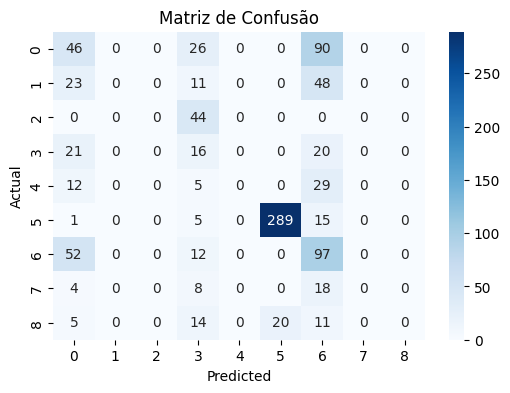



Relatório de Classificação:


              precision    recall  f1-score   support

   Adventure       0.28      0.28      0.28       162
     Brawler       0.00      0.00      0.00        82
       Indie       0.00      0.00      0.00        44
    Platform       0.11      0.28      0.16        57
      Puzzle       0.00      0.00      0.00        46
         RPG       0.94      0.93      0.93       310
     Shooter       0.30      0.60      0.40       161
   Simulator       0.00      0.00      0.00        30
    Strategy       0.00      0.00      0.00        50

    accuracy                           0.48       942
   macro avg       0.18      0.23      0.20       942
weighted avg       0.41      0.48      0.43       942



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Predicao_Gradient_B_M = Gradient_Boost_Model.predict(X_teste)

# Acurácia
acuracia = accuracy_score(y_teste, Predicao_Gradient_B_M)

# Precisão
precisao = precision_score(y_teste, Predicao_Gradient_B_M, average ='weighted', zero_division=0)

# Recall
recall = recall_score(y_teste, Predicao_Gradient_B_M, average ='weighted', zero_division=0)

# F1-score
f1 = f1_score(y_teste, Predicao_Gradient_B_M, average ='weighted', zero_division=0)

# Matriz de confusão
Confusao = confusion_matrix(y_teste, Predicao_Gradient_B_M)

# Exibe todas as métricas e a matriz de confusão
print(f'\033[1mAcurácia:\033[0m {acuracia}')
print(f'\033[1mPrecisão:\033[0m {precisao}')
print(f'\033[1mRecall:\033[0m {recall}')
print(f'\033[1mF1-Score:\033[0m {f1}')
print('\n')

# Exiba a matriz de confusão usando seaborn
print(f'\033[1mMatriz de Confusão:\033[0m')
print('\n')
plt.figure(figsize=(6, 4))
sns.heatmap(Confusao, annot=True, fmt="d", cmap="Blues")# xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de Classificação por Valor do Alvo
report = classification_report(y_teste, Predicao_Gradient_B_M)
print('\n')
print(f'\033[1mRelatório de Classificação:\033[0m')
print('\n')
print(report)

## Ajustando o Algoritmo XGBClassifier

Acurácia: 0.5095541401273885
Precisão: 0.4596521607128318
Recall: 0.5095541401273885
F1-Score: 0.45850846877442075


Matriz de Confusão:




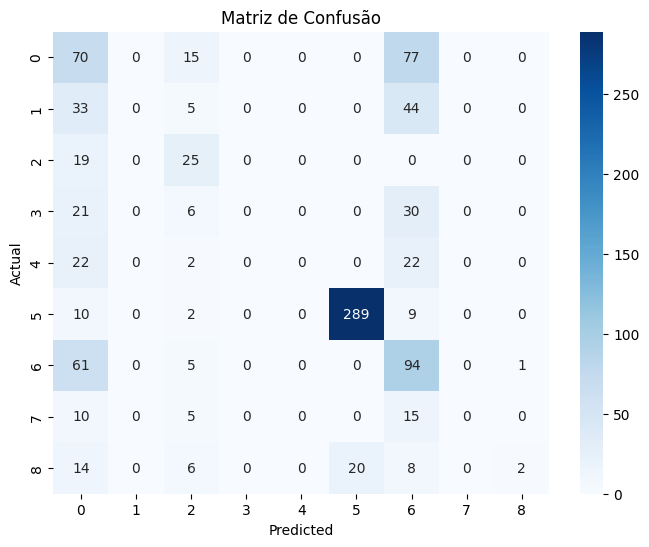



Relatório de Classificação:


              precision    recall  f1-score   support

           0       0.27      0.43      0.33       162
           1       0.00      0.00      0.00        82
           2       0.35      0.57      0.43        44
           3       0.00      0.00      0.00        57
           4       0.00      0.00      0.00        46
           5       0.94      0.93      0.93       310
           6       0.31      0.58      0.41       161
           7       0.00      0.00      0.00        30
           8       0.67      0.04      0.08        50

    accuracy                           0.51       942
   macro avg       0.28      0.28      0.24       942
weighted avg       0.46      0.51      0.46       942



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
GBM = XGBClassifier(n_estimators=5, max_depth=2, learning_rate=1, objective='multi:softprob', num_class=9)
GBM.fit(X_treino, y_encoded)
Predicao_GBM = GBM.predict(X_teste)

# Acurácia
acuracia = accuracy_score(y_encoded_Test, Predicao_GBM)

# Precisão
precisao = precision_score(y_encoded_Test, Predicao_GBM, average ='weighted', zero_division=0)

# Recall
recall = recall_score(y_encoded_Test, Predicao_GBM, average ='weighted', zero_division=0)

# F1-score
f1 = f1_score(y_encoded_Test, Predicao_GBM, average ='weighted', zero_division=0)

# Matriz de confusão
Confusao = confusion_matrix(y_encoded_Test, Predicao_GBM)

# Exibe todas as métricas e a matriz de confusão
print(f'\033[1mAcurácia:\033[0m {acuracia}')
print(f'\033[1mPrecisão:\033[0m {precisao}')
print(f'\033[1mRecall:\033[0m {recall}')
print(f'\033[1mF1-Score:\033[0m {f1}')
print('\n')

# Exiba a matriz de confusão usando seaborn
print(f'\033[1mMatriz de Confusão:\033[0m')
print('\n')
plt.figure(figsize=(8, 6))
sns.heatmap(Confusao, annot=True, fmt="d", cmap="Blues")# xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de Classificação por Valor do Alvo
report = classification_report(y_encoded_Test, Predicao_GBM)
print('\n')
print(f'\033[1mRelatório de Classificação:\033[0m')
print('\n')
print(report)

Mesmo ajustando os parâmetros, ainda não melhorou muito.


*   **F1-Score:** 0.46
*   **Acurácia:** 0.51 = 51% de acerto

Analisando a matriz de confusão o alto verdadeiro positivo continua se concentrando em um único valor da variável alvo que é o Gênero **RPG**.

# Modelo de Classificação Naive Bayes

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.32908704883227174
Precisão: 0.10829828570913402
Recall: 0.32908704883227174
F1-Score: 0.16296642993291413


Matriz de Confusão:




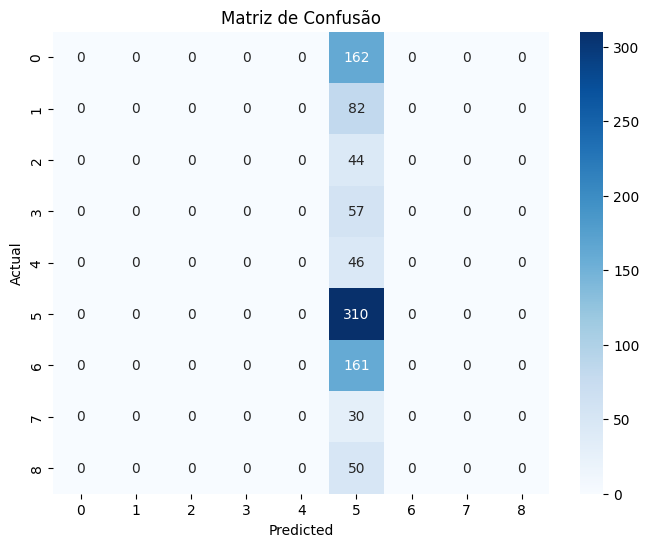

Relatório de Classificação:


              precision    recall  f1-score   support

   Adventure       0.00      0.00      0.00       162
     Brawler       0.00      0.00      0.00        82
       Indie       0.00      0.00      0.00        44
    Platform       0.00      0.00      0.00        57
      Puzzle       0.00      0.00      0.00        46
         RPG       0.33      1.00      0.50       310
     Shooter       0.00      0.00      0.00       161
   Simulator       0.00      0.00      0.00        30
    Strategy       0.00      0.00      0.00        50

    accuracy                           0.33       942
   macro avg       0.04      0.11      0.06       942
weighted avg       0.11      0.33      0.16       942



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import BernoulliNB

NB_Multi = BernoulliNB()
NB_Multi.fit(X_treino, y_treino)
NB_pred = NB_Multi.predict(X_teste)

# Acurácia
acuracia = accuracy_score(y_teste, NB_pred)

# Precisão
precisao = precision_score(y_teste, NB_pred, average ='weighted', zero_division=0)

# Recall
recall = recall_score(y_teste, NB_pred, average ='weighted', zero_division=0)

# F1-score
f1 = f1_score(y_teste, NB_pred, average ='weighted', zero_division=0)

# Matriz de confusão
Confusao = confusion_matrix(y_teste, NB_pred)

# Exibe todas as métricas
print(f'\033[1mAcurácia:\033[0m {acuracia}')
print(f'\033[1mPrecisão:\033[0m {precisao}')
print(f'\033[1mRecall:\033[0m {recall}')
print(f'\033[1mF1-Score:\033[0m {f1}')
print('\n')

# Matriz de confusão
print(f'\033[1mMatriz de Confusão:\033[0m')
print('\n')
plt.figure(figsize=(8, 6))
sns.heatmap(Confusao, annot=True, fmt="d", cmap="Blues")# xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de Classificação por Valor do Alvo
report = classification_report(y_teste, NB_pred)

print(f'\033[1mRelatório de Classificação:\033[0m')
print('\n')
print(report)

# Modelo de Classificação Árvore de Decisão

Acurácia: 0.5095541401273885
Precisão: 0.4875494349778316
Recall: 0.5095541401273885
F1-Score: 0.46960322389083253


Matriz de Confusão:




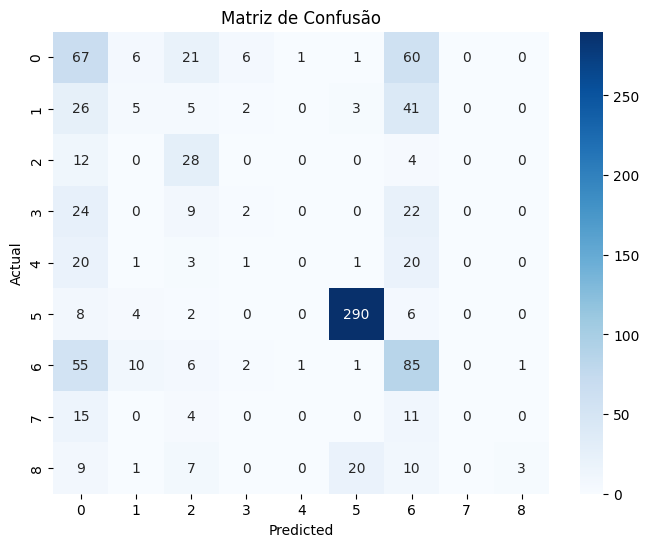

Relatório de Classificação:


              precision    recall  f1-score   support

   Adventure       0.28      0.41      0.34       162
     Brawler       0.19      0.06      0.09        82
       Indie       0.33      0.64      0.43        44
    Platform       0.15      0.04      0.06        57
      Puzzle       0.00      0.00      0.00        46
         RPG       0.92      0.94      0.93       310
     Shooter       0.33      0.53      0.40       161
   Simulator       0.00      0.00      0.00        30
    Strategy       0.75      0.06      0.11        50

    accuracy                           0.51       942
   macro avg       0.33      0.30      0.26       942
weighted avg       0.49      0.51      0.47       942



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Árvore de Decisão
dtc = DecisionTreeClassifier()
dtc.fit(X_treino, y_treino)
dtc_predicao = dtc.predict(X_teste)

# Acurácia
acuracia = accuracy_score(y_teste, dtc_predicao)

# Precisão
precisao = precision_score(y_teste, dtc_predicao, average ='weighted', zero_division=0)

# Recall
recall = recall_score(y_teste, dtc_predicao, average ='weighted', zero_division=0)

# F1-score
f1 = f1_score(y_teste, dtc_predicao, average ='weighted', zero_division=0)

# Matriz de confusão
Confusao = confusion_matrix(y_teste, dtc_predicao)

# Exibe todas as métricas
print(f'\033[1mAcurácia:\033[0m {acuracia}')
print(f'\033[1mPrecisão:\033[0m {precisao}')
print(f'\033[1mRecall:\033[0m {recall}')
print(f'\033[1mF1-Score:\033[0m {f1}')
print('\n')

# Matriz de confusão
print(f'\033[1mMatriz de Confusão:\033[0m')
print('\n')
plt.figure(figsize=(8, 6))
sns.heatmap(Confusao, annot=True, fmt="d", cmap="Blues")# xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de Classificação por Valor do Alvo
report = classification_report(y_teste, dtc_predicao)

print(f'\033[1mRelatório de Classificação:\033[0m')
print('\n')
print(report)

Com esse modelo também não melhorou:


*   **F1-Score:** 0.47
*   **Acurácia:** 0.51 = 51% de acerto

Analisando a matriz de confusão o alto verdadeiro positivo continua se concentrando em um único valor da variável alvo que é o Gênero **RPG**.

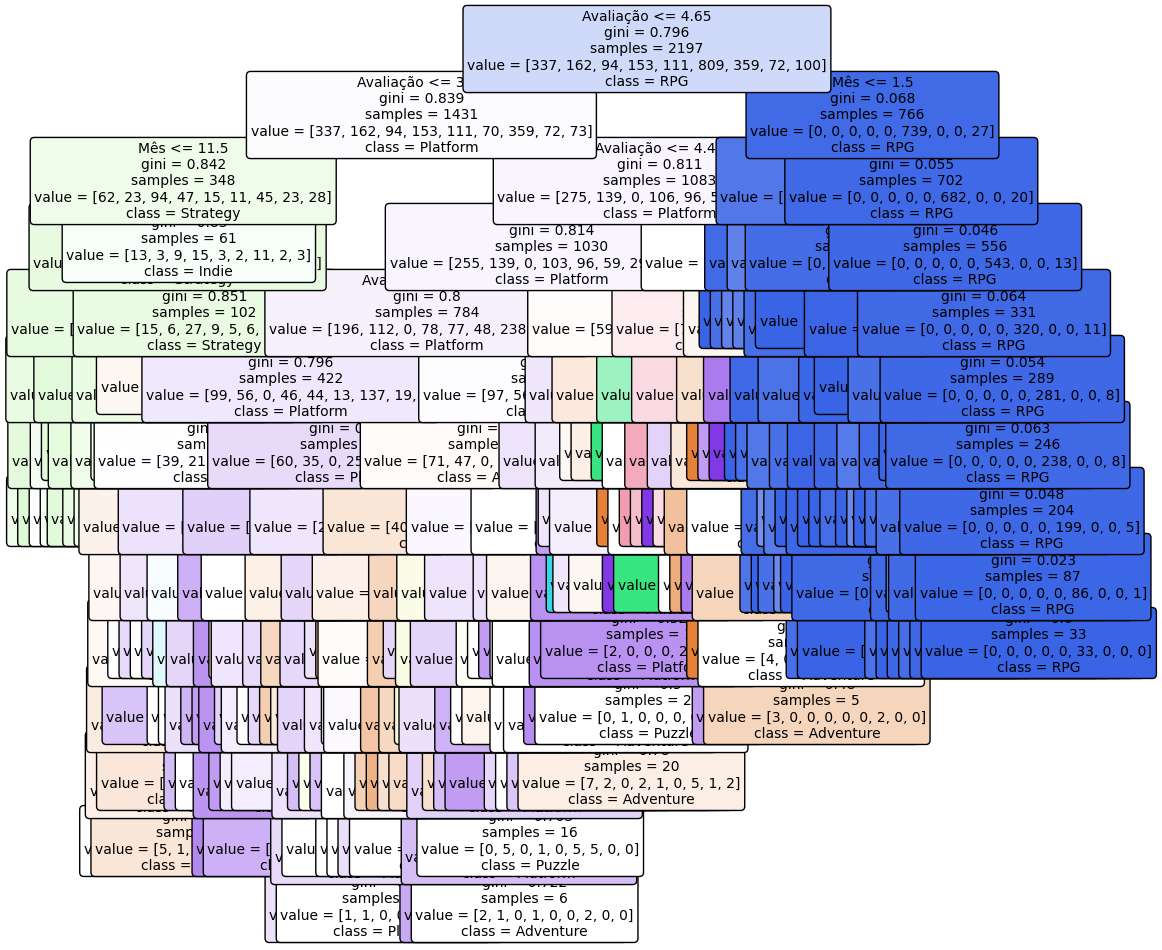

In [ ]:
# Visualize a árvore de decisão como um gráfico (imagem)
fig, ax = plt.subplots(figsize=(12, 12))
_ = tree.plot_tree(dtc, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, fontsize=10, ax=ax)
plt.show()

Conforme observado acima, todos os algoritmos ainda não estão performando corretamente devido ao excesso de rótulos. Vamos calibrar o modelo inicialmente considerando apenas a variável Avaliação, para ver se houve melhora.

In [ ]:
# Definindo as colunas de entrada e saída
X = games_df[['Avaliação']]
y = games_df[['Genero']]

<ipython-input-179-9bfd98d4329c>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_treino, y_treino)


Acurácia: 0.5127388535031847
Precisão: 0.4521517681153478
Recall: 0.5127388535031847
F1-Score: 0.46040137147202487


Matriz de Confusão:




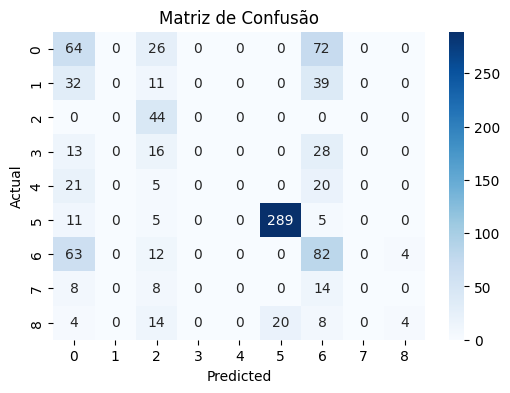



Relatório de Classificação:


              precision    recall  f1-score   support

   Adventure       0.30      0.40      0.34       162
     Brawler       0.00      0.00      0.00        82
       Indie       0.31      1.00      0.48        44
    Platform       0.00      0.00      0.00        57
      Puzzle       0.00      0.00      0.00        46
         RPG       0.94      0.93      0.93       310
     Shooter       0.31      0.51      0.38       161
   Simulator       0.00      0.00      0.00        30
    Strategy       0.50      0.08      0.14        50

    accuracy                           0.51       942
   macro avg       0.26      0.32      0.25       942
weighted avg       0.45      0.51      0.46       942



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

# Aplicando novamente o Algorítmo Floresta Randômica com 100 árvores de decisão:
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_treino, y_treino)
predicao = modelo.predict(X_teste)

acuracia = accuracy_score(y_teste, predicao)
precisao = precision_score(y_teste, predicao, average ='weighted', zero_division=0)
recall = recall_score(y_teste, predicao, average ='weighted', zero_division=0)
f1 = f1_score(y_teste, predicao, average ='weighted', zero_division=0)

Confusao = confusion_matrix(y_teste, predicao)

print(f'\033[1mAcurácia:\033[0m {acuracia}')
print(f'\033[1mPrecisão:\033[0m {precisao}')
print(f'\033[1mRecall:\033[0m {recall}')
print(f'\033[1mF1-Score:\033[0m {f1}')
print('\n')

print(f'\033[1mMatriz de Confusão:\033[0m')
print('\n')
plt.figure(figsize=(6, 4))
sns.heatmap(Confusao, annot=True, fmt="d", cmap="Blues")# xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusão")
plt.show()
print('\n')
report = classification_report(y_teste, predicao)

print(f'\033[1mRelatório de Classificação:\033[0m')
print('\n')
print(report)

A partir do F1-Score e Acurácia acima, identificamos que o modelo está com baixo desempenho, pois analisando o F1-Score de 0.46 entendemos que o modelo não está alcançando um bom equilíbrio entre precisão e recall. Praticamente falando, ele está predizendo de forma imprecisa ou deixando de identificar corretamente muitos exemplos positivos.

A métrica de Acurácia também está muito baixa (0.51) ou seja, acertando apenas 51% das predições.

Analisando a matriz de confusão também percebemos um alto valor de predição para um único valor da variável alvo que é o Gênero RPG.

Será necessário reavaliar o conjunto de dados para diminuir o número de rótulos assim como priorizar o número de anos visando melhora das métricas acima.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.5127388535031847
Precisão: 0.4265737135896747
Recall: 0.5127388535031847
F1-Score: 0.4550129253793583


Matriz de Confusão:




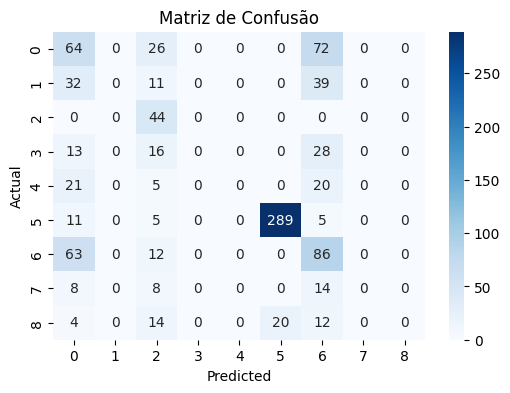



Relatório de Classificação:


              precision    recall  f1-score   support

           0       0.30      0.40      0.34       162
           1       0.00      0.00      0.00        82
           2       0.31      1.00      0.48        44
           3       0.00      0.00      0.00        57
           4       0.00      0.00      0.00        46
           5       0.94      0.93      0.93       310
           6       0.31      0.53      0.39       161
           7       0.00      0.00      0.00        30
           8       0.00      0.00      0.00        50

    accuracy                           0.51       942
   macro avg       0.21      0.32      0.24       942
weighted avg       0.43      0.51      0.46       942



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Criar a base do modelo XGBoost
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Para XGBClassifier, foi necessário converter os valores de texto em valores numéricos
y_encoded = label_encoder.fit_transform(y_treino)
y_encoded_Test = label_encoder.fit_transform(y_teste)

GBM = XGBClassifier()
GBM.fit(X_treino, y_encoded)
Predicao_GBM = GBM.predict(X_teste)

# Acurácia
acuracia = accuracy_score(y_encoded_Test, Predicao_GBM)

# Precisão
precisao = precision_score(y_encoded_Test, Predicao_GBM, average ='weighted', zero_division=0)

# Recall
recall = recall_score(y_encoded_Test, Predicao_GBM, average ='weighted', zero_division=0)

# F1-score
f1 = f1_score(y_encoded_Test, Predicao_GBM, average ='weighted', zero_division=0)

# Matriz de confusão
Confusao = confusion_matrix(y_encoded_Test, Predicao_GBM)

# Exibe todas as métricas e a matriz de confusão
print(f'\033[1mAcurácia:\033[0m {acuracia}')
print(f'\033[1mPrecisão:\033[0m {precisao}')
print(f'\033[1mRecall:\033[0m {recall}')
print(f'\033[1mF1-Score:\033[0m {f1}')
print('\n')

# Exiba a matriz de confusão usando seaborn
print(f'\033[1mMatriz de Confusão:\033[0m')
print('\n')
plt.figure(figsize=(6, 4))
sns.heatmap(Confusao, annot=True, fmt="d", cmap="Blues")# xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de Classificação por Valor do Alvo
report = classification_report(y_encoded_Test, Predicao_GBM)
print('\n')
print(f'\033[1mRelatório de Classificação:\033[0m')
print('\n')
print(report)

Mesmo ajustando os parâmetros, ainda não melhorou muito.


*   **F1-Score:** 0.46
*   **Acurácia:** 0.51 = 51% de acerto

Analisando a matriz de confusão o alto verdadeiro positivo continua se concentrando em um único valor da variável alvo que é o Gênero **RPG**.

Após análises acima, foi verificado que para melhor treinamento vamos limitar a quantidade da amostra com valores de Gênero aos percentuais com 2 casas mais representativos, além de remover informações com mais de 5 anos, após aplicação do modelo, o esperado é um valor de pelo menos 80% de score. Atingindo esse valor, vamos verificar a maior presença de Gênero para o mês Dezembro.

In [183]:
# Reavaliação do campo Genero
tabela_cruzada = games_df.groupby('Genero').size().reset_index(name='Quantidade')
tabela_cruzada = tabela_cruzada.sort_values(by='Quantidade', ascending=False)
total_linhas = len(games_df)
tabela_cruzada['Percentual do Total'] = (tabela_cruzada['Quantidade'] / total_linhas) * 100
print(tabela_cruzada)

      Genero  Quantidade  Percentual do Total
5        RPG        1139            36.285441
6    Shooter         524            16.693214
0  Adventure         514            16.374642
1    Brawler         234             7.454603
3   Platform         207             6.594457
4     Puzzle         154             4.906021
8   Strategy         136             4.332590
2      Indie         131             4.173304
7  Simulator         100             3.185728


In [184]:
#Remover os dados abaixo de 10%
remover_generos = ['Brawler','Platform','Puzzle','Strategy','Indie','Simulator']

games_df_filtrado = games_df[~games_df['Genero'].isin(remover_generos)]

In [185]:
tabela_cruzada = games_df_filtrado.groupby('Genero').size().reset_index(name='Quantidade')
tabela_cruzada = tabela_cruzada.sort_values(by='Quantidade', ascending=False)
total_linhas = len(games_df_filtrado)
tabela_cruzada['Percentual do Total'] = (tabela_cruzada['Quantidade'] / total_linhas) * 100
print(tabela_cruzada)

      Genero  Quantidade  Percentual do Total
1        RPG        1139            52.319706
2    Shooter         524            24.069821
0  Adventure         514            23.610473


In [186]:
# Removendo anos abaixo de 2018
games_df_filtrado = games_df_filtrado[games_df_filtrado['Ano'] >= 2018]
games_df_filtrado = games_df_filtrado[games_df_filtrado['Ano'] != 2024] #Ruído nos dados

In [187]:
tabela_cruzada = games_df_filtrado.groupby('Ano').size().reset_index(name='Quantidade')
tabela_cruzada = tabela_cruzada.sort_values(by='Quantidade', ascending=False)
total_linhas = len(games_df_filtrado)
tabela_cruzada['Percentual do Total'] = (tabela_cruzada['Quantidade'] / total_linhas) * 100
print(tabela_cruzada)

    Ano  Quantidade  Percentual do Total
4  2022         227            21.234799
2  2020         195            18.241347
5  2023         180            16.838167
1  2019         172            16.089804
3  2021         168            15.715622
0  2018         127            11.880262


In [188]:
# Definindo as colunas de entrada e saída
X = games_df_filtrado[['Mês','Avaliação']]
y = games_df_filtrado[['Genero']]

<ipython-input-189-ecb54caf8686>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_treino, y_treino)


Acurácia: 0.8068535825545171
Precisão: 0.8223834057946208
Recall: 0.8068535825545171
F1-Score: 0.8132242609951563


Matriz de Confusão:




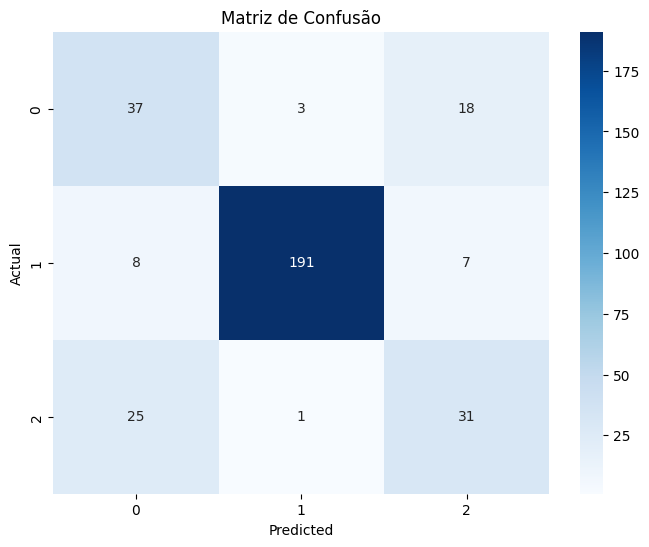



Relatório de Classificação:


              precision    recall  f1-score   support

   Adventure       0.53      0.64      0.58        58
         RPG       0.98      0.93      0.95       206
     Shooter       0.55      0.54      0.55        57

    accuracy                           0.81       321
   macro avg       0.69      0.70      0.69       321
weighted avg       0.82      0.81      0.81       321



In [189]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

# Aplicando novamente o Algorítmo Floresta Randômica com 100 árvores de decisão:
modelo = RandomForestClassifier(n_estimators=300, random_state=42)
modelo.fit(X_treino, y_treino)
predicao = modelo.predict(X_teste)

acuracia = accuracy_score(y_teste, predicao)
precisao = precision_score(y_teste, predicao, average ='weighted', zero_division=0)
recall = recall_score(y_teste, predicao, average ='weighted', zero_division=0)
f1 = f1_score(y_teste, predicao, average ='weighted', zero_division=0)

Confusao = confusion_matrix(y_teste, predicao)

print(f'\033[1mAcurácia:\033[0m {acuracia}')
print(f'\033[1mPrecisão:\033[0m {precisao}')
print(f'\033[1mRecall:\033[0m {recall}')
print(f'\033[1mF1-Score:\033[0m {f1}')
print('\n')

print(f'\033[1mMatriz de Confusão:\033[0m')
print('\n')
plt.figure(figsize=(8, 6))
sns.heatmap(Confusao, annot=True, fmt="d", cmap="Blues")# xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusão")
plt.show()
print('\n')
report = classification_report(y_teste, predicao)

print(f'\033[1mRelatório de Classificação:\033[0m')
print('\n')
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.8193146417445483
Precisão: 0.8292030226609665
Recall: 0.8193146417445483
F1-Score: 0.8237148291100297


Matriz de Confusão:




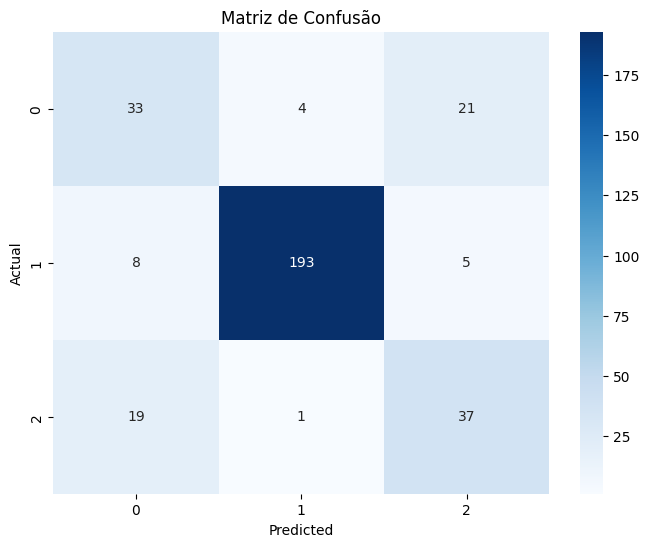



Relatório de Classificação:


              precision    recall  f1-score   support

           0       0.55      0.57      0.56        58
           1       0.97      0.94      0.96       206
           2       0.59      0.65      0.62        57

    accuracy                           0.82       321
   macro avg       0.70      0.72      0.71       321
weighted avg       0.83      0.82      0.82       321



In [198]:
# Criar a base do modelo XGBoost
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Para XGBClassifier, foi necessário converter os valores de texto em valores numéricos
y_encoded = label_encoder.fit_transform(y_treino)
y_encoded_Test = label_encoder.fit_transform(y_teste)

GBM = XGBClassifier()
#GBM = XGBClassifier(n_estimators=3, max_depth=5, learning_rate=1, objective='multi:softprob', num_class=3)
GBM.fit(X_treino, y_encoded)
Predicao_GBM = GBM.predict(X_teste)

# Acurácia
acuracia = accuracy_score(y_encoded_Test, Predicao_GBM)

# Precisão
precisao = precision_score(y_encoded_Test, Predicao_GBM, average ='weighted', zero_division=0)

# Recall
recall = recall_score(y_encoded_Test, Predicao_GBM, average ='weighted', zero_division=0)

# F1-score
f1 = f1_score(y_encoded_Test, Predicao_GBM, average ='weighted', zero_division=0)

# Matriz de confusão
Confusao = confusion_matrix(y_encoded_Test, Predicao_GBM)

# Exibe todas as métricas e a matriz de confusão
print(f'\033[1mAcurácia:\033[0m {acuracia}')
print(f'\033[1mPrecisão:\033[0m {precisao}')
print(f'\033[1mRecall:\033[0m {recall}')
print(f'\033[1mF1-Score:\033[0m {f1}')
print('\n')

# Exiba a matriz de confusão usando seaborn
print(f'\033[1mMatriz de Confusão:\033[0m')
print('\n')
plt.figure(figsize=(8, 6))
sns.heatmap(Confusao, annot=True, fmt="d", cmap="Blues")# xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de Classificação por Valor do Alvo
report = classification_report(y_encoded_Test, Predicao_GBM)
print('\n')
print(f'\033[1mRelatório de Classificação:\033[0m')
print('\n')
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.6417445482866043
Precisão: 0.41183606525557787
Recall: 0.6417445482866043
F1-Score: 0.5017054153587875


Matriz de Confusão:




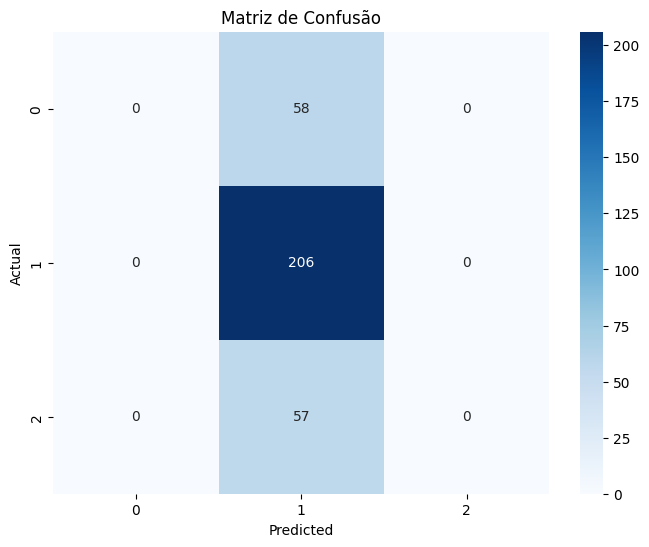

Relatório de Classificação:


              precision    recall  f1-score   support

   Adventure       0.00      0.00      0.00        58
         RPG       0.64      1.00      0.78       206
     Shooter       0.00      0.00      0.00        57

    accuracy                           0.64       321
   macro avg       0.21      0.33      0.26       321
weighted avg       0.41      0.64      0.50       321



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [193]:
from sklearn.naive_bayes import BernoulliNB

NB_Multi = BernoulliNB()
NB_Multi.fit(X_treino, y_treino)
NB_pred = NB_Multi.predict(X_teste)

# Acurácia
acuracia = accuracy_score(y_teste, NB_pred)

# Precisão
precisao = precision_score(y_teste, NB_pred, average ='weighted', zero_division=0)

# Recall
recall = recall_score(y_teste, NB_pred, average ='weighted', zero_division=0)

# F1-score
f1 = f1_score(y_teste, NB_pred, average ='weighted', zero_division=0)

# Matriz de confusão
Confusao = confusion_matrix(y_teste, NB_pred)

# Exibe todas as métricas
print(f'\033[1mAcurácia:\033[0m {acuracia}')
print(f'\033[1mPrecisão:\033[0m {precisao}')
print(f'\033[1mRecall:\033[0m {recall}')
print(f'\033[1mF1-Score:\033[0m {f1}')
print('\n')

# Matriz de confusão
print(f'\033[1mMatriz de Confusão:\033[0m')
print('\n')
plt.figure(figsize=(8, 6))
sns.heatmap(Confusao, annot=True, fmt="d", cmap="Blues")# xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de Classificação por Valor do Alvo
report = classification_report(y_teste, NB_pred)

print(f'\033[1mRelatório de Classificação:\033[0m')
print('\n')
print(report)

In [ ]:
games_df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1069 entries, 0 to 3133
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   User_ID    1069 non-null   int64  
 1   Avaliação  1069 non-null   float64
 2   Ano        1069 non-null   int64  
 3   Mês        1069 non-null   int64  
 4   Genero     1069 non-null   object 
 5   Previsoes  1069 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 58.5+ KB


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Acurácia: 0.7632398753894081
Precisão: 0.7808858861880982
Recall: 0.7632398753894081
F1-Score: 0.763826474901467


Matriz de Confusão:




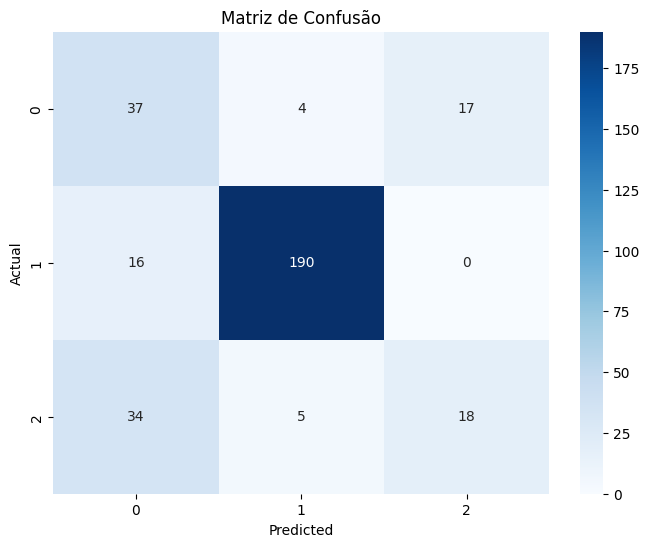



Relatório de Classificação:


              precision    recall  f1-score   support

   Adventure       0.43      0.64      0.51        58
         RPG       0.95      0.92      0.94       206
     Shooter       0.51      0.32      0.39        57

    accuracy                           0.76       321
   macro avg       0.63      0.63      0.61       321
weighted avg       0.78      0.76      0.76       321



In [191]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)

# Treine o modelo com os dados de treinamento
knn.fit(X_treino, y_treino)

# Faça previsões no conjunto de teste
predicao = knn.predict(X_teste)

# Acurácia
acuracia = accuracy_score(y_teste, predicao)

# Precisão
precisao = precision_score(y_teste, predicao, average ='weighted', zero_division=0)

# Recall
recall = recall_score(y_teste, predicao, average ='weighted', zero_division=0)

# F1-score
f1 = f1_score(y_teste, predicao, average ='weighted', zero_division=0)

# Matriz de confusão
Confusao = confusion_matrix(y_teste, predicao)

# Exibe todas as métricas e a matriz de confusão
print(f'\033[1mAcurácia:\033[0m {acuracia}')
print(f'\033[1mPrecisão:\033[0m {precisao}')
print(f'\033[1mRecall:\033[0m {recall}')
print(f'\033[1mF1-Score:\033[0m {f1}')
print('\n')

# Exiba a matriz de confusão usando seaborn
print(f'\033[1mMatriz de Confusão:\033[0m')
print('\n')
plt.figure(figsize=(8, 6))
sns.heatmap(Confusao, annot=True, fmt="d", cmap="Blues")# xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de Classificação por Valor do Alvo
report = classification_report(y_teste, predicao)
print('\n')
print(f'\033[1mRelatório de Classificação:\033[0m')
print('\n')
print(report)

In [194]:
#GradientBoostingClassifier
Gradient_Boost_Model = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=42)

# Treine o modelo com os dados de treinamento
Gradient_Boost_Model.fit(X_treino, y_treino['Genero'].ravel())

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=10,
                           random_state=42)

Acurácia: 0.8068535825545171
Precisão: 0.8305121669607651
Recall: 0.8068535825545171
F1-Score: 0.8168133734580054


Matriz de Confusão:




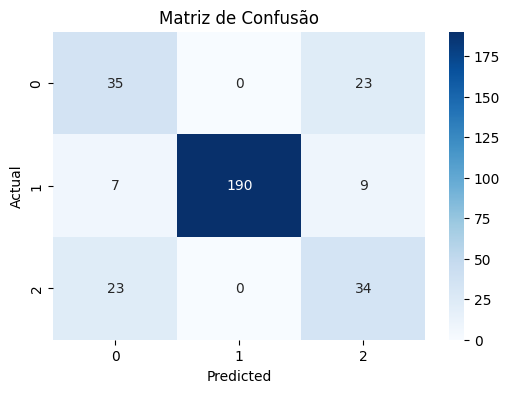



Relatório de Classificação:


              precision    recall  f1-score   support

   Adventure       0.54      0.60      0.57        58
         RPG       1.00      0.92      0.96       206
     Shooter       0.52      0.60      0.55        57

    accuracy                           0.81       321
   macro avg       0.68      0.71      0.69       321
weighted avg       0.83      0.81      0.82       321



In [195]:
Predicao_Gradient_B_M = Gradient_Boost_Model.predict(X_teste)

# Acurácia
acuracia = accuracy_score(y_teste, Predicao_Gradient_B_M)

# Precisão
precisao = precision_score(y_teste, Predicao_Gradient_B_M, average ='weighted', zero_division=0)

# Recall
recall = recall_score(y_teste, Predicao_Gradient_B_M, average ='weighted', zero_division=0)

# F1-score
f1 = f1_score(y_teste, Predicao_Gradient_B_M, average ='weighted', zero_division=0)

# Matriz de confusão
Confusao = confusion_matrix(y_teste, Predicao_Gradient_B_M)

# Exibe todas as métricas e a matriz de confusão
print(f'\033[1mAcurácia:\033[0m {acuracia}')
print(f'\033[1mPrecisão:\033[0m {precisao}')
print(f'\033[1mRecall:\033[0m {recall}')
print(f'\033[1mF1-Score:\033[0m {f1}')
print('\n')

# Exiba a matriz de confusão usando seaborn
print(f'\033[1mMatriz de Confusão:\033[0m')
print('\n')
plt.figure(figsize=(6, 4))
sns.heatmap(Confusao, annot=True, fmt="d", cmap="Blues")# xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de Classificação por Valor do Alvo
report = classification_report(y_teste, Predicao_Gradient_B_M)
print('\n')
print(f'\033[1mRelatório de Classificação:\033[0m')
print('\n')
print(report)

Acurácia: 0.8068535825545171
Precisão: 0.8220285063230127
Recall: 0.8068535825545171
F1-Score: 0.8085362913556281


Matriz de Confusão:




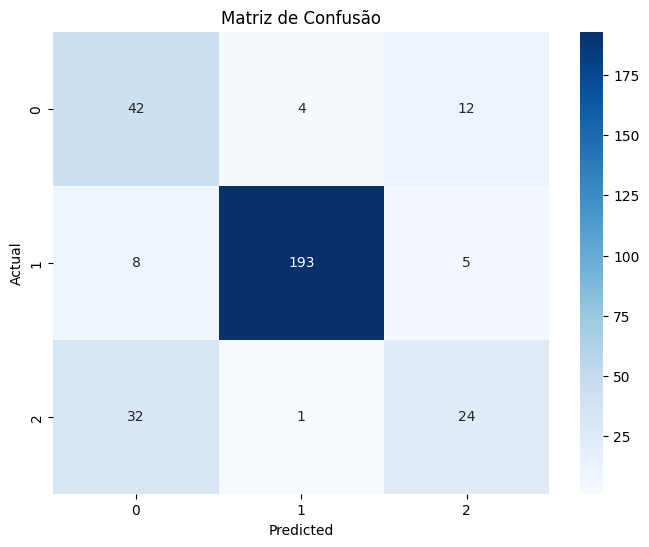

Relatório de Classificação:


              precision    recall  f1-score   support

   Adventure       0.51      0.72      0.60        58
         RPG       0.97      0.94      0.96       206
     Shooter       0.59      0.42      0.49        57

    accuracy                           0.81       321
   macro avg       0.69      0.69      0.68       321
weighted avg       0.82      0.81      0.81       321



In [192]:
# Árvore de Decisão
dtc = DecisionTreeClassifier()
dtc.fit(X_treino, y_treino)
dtc_predicao = dtc.predict(X_teste)

# Acurácia
acuracia = accuracy_score(y_teste, dtc_predicao)

# Precisão
precisao = precision_score(y_teste, dtc_predicao, average ='weighted', zero_division=0)

# Recall
recall = recall_score(y_teste, dtc_predicao, average ='weighted', zero_division=0)

# F1-score
f1 = f1_score(y_teste, dtc_predicao, average ='weighted', zero_division=0)

# Matriz de confusão
Confusao = confusion_matrix(y_teste, dtc_predicao)

# Exibe todas as métricas
print(f'\033[1mAcurácia:\033[0m {acuracia}')
print(f'\033[1mPrecisão:\033[0m {precisao}')
print(f'\033[1mRecall:\033[0m {recall}')
print(f'\033[1mF1-Score:\033[0m {f1}')
print('\n')

# Matriz de confusão
print(f'\033[1mMatriz de Confusão:\033[0m')
print('\n')
plt.figure(figsize=(8, 6))
sns.heatmap(Confusao, annot=True, fmt="d", cmap="Blues")# xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de Classificação por Valor do Alvo
report = classification_report(y_teste, dtc_predicao)

print(f'\033[1mRelatório de Classificação:\033[0m')
print('\n')
print(report)

Considerando a baixa correlação entre os dados de entrada, seguiremos com o modelo de 80% de acurácia. Em cima da amostra vamos buscar os Gêneros mais representativos para o mês de Dezembro, a qual será nosso Gênero escolhido.

In [204]:
y_total_encoded = label_encoder.fit_transform(y)

GBM = XGBClassifier()
GBM.fit(X, y_total_encoded)
GBM_predicao = GBM.predict(X)

GBM_predicao_original = label_encoder.inverse_transform(GBM_predicao)

games_df_filtrado['Genero_Previsto'] = GBM_predicao_original
games_df_filtrado

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,User_ID,Avaliação,Ano,Mês,Genero,Data,Genero_Previsto
315,16,4.1,2021,1,Shooter,2021-01-01,Shooter
316,19,4.3,2023,3,Shooter,2023-03-01,Shooter
317,20,4.3,2019,8,Shooter,2019-08-01,Shooter
318,23,3.9,2022,3,Shooter,2022-03-01,Shooter
322,77,4.3,2019,6,Shooter,2019-06-01,Shooter
...,...,...,...,...,...,...,...
3023,3899,3.8,2019,9,Adventure,2019-09-01,Adventure
3027,3918,3.8,2018,5,Adventure,2018-05-01,Adventure
3030,3945,4.1,2019,2,Adventure,2019-02-01,Shooter
3037,3978,4.0,2023,2,Adventure,2023-02-01,Shooter


In [205]:
# Filtre o DataFrame para incluir apenas entradas com mês igual a "Dezembro"
games_df_filtrado_dezembro = games_df_filtrado[games_df_filtrado['Mês'] == 12]

# Reavaliação do campo Genero
tabela_cruzada = games_df_filtrado_dezembro.groupby('Genero_Previsto').size().reset_index(name='Quantidade')
tabela_cruzada = tabela_cruzada.sort_values(by='Quantidade', ascending=False)
total_linhas = len(games_df_filtrado_dezembro)
tabela_cruzada['Percentual do Total'] = (tabela_cruzada['Quantidade'] / total_linhas) * 100
print(tabela_cruzada)

  Genero_Previsto  Quantidade  Percentual do Total
1             RPG         146            62.393162
0       Adventure          78            33.333333
2         Shooter          10             4.273504


Gênero mais previsto para campanhas no Natal: RPG com 146 linhas, representando 62,39%

In [206]:
from google.cloud import storage
project_id = 'ultimate-flame-398623'
bucket_name = 'teste_bucket_daniel'
destination_blob_name = 'Games_Teste.csv'

In [207]:
# Inicialize o cliente de armazenamento do Google Cloud
storage_client = storage.Client(project=project_id)

# Carregue o DataFrame diretamente no Cloud Storage como um arquivo CSV
novo_df_teste = games_df_filtrado[['Avaliação', 'Mês', 'Genero']]

bucket = storage_client.bucket(bucket_name)
blob = bucket.blob(destination_blob_name)
blob.upload_from_string(novo_df_teste.to_csv(index=False), content_type='text/csv')